# L.EIC – BSc/First Degree in Informatics and Computing Engineering
## 2024/2025 (3rd Year) - 2nd Semester
## Artificial Intelligence - Assignment No. 2: Supervised Learning
## Dataset: Steel Plate Defect Prediction
## Date: 25/05/2025
## Students: Douglas Oliveira de Jesus e João Pedro Bastos.


## ⚠️ O Dataset tem que ser upado no diretório principal.
⚠️ Dataset disponível no repositório do Github: https://github.com/douglasojesus/steel-plate-defect-prediction

# 1. CONFIGURAÇÃO INICIAL, IMPORTAÇÕES, CARREGAMENTO E EXPLORAÇÃO INICIAL DOS DADOS




1.1 Importação incial

In [17]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif

# Configurações para melhores visualizações
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

1.2 Carregamento dos dados

In [18]:
try:
    steel_data = pd.read_csv('train.csv')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Arquivo 'train.csv' não encontrado. Verifique o caminho do arquivo.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar os dados: {e}")
    steel_data = pd.DataFrame()

Dataset carregado com sucesso!


1.3 Inspeção inicial dos dados

In [19]:
if not steel_data.empty:
    print("\nPrimeiras 5 linhas do dataset:")
    display(steel_data.head())

    print(f"\nDimensões do dataset: {steel_data.shape[0]} linhas e {steel_data.shape[1]} colunas.")
else:
    print("\nDataset vazio. Não é possível realizar a inspeção inicial.")


Primeiras 5 linhas do dataset:


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1



Dimensões do dataset: 19219 linhas e 35 colunas.


Observamos a presença de uma coluna `id`, diversas colunas de características (features) com nomes como `X_Minimum`, `Pixels_Areas`, `TypeOfSteel_A300`, etc., e as sete colunas alvo no final (`Pastry` a `Other_Faults`), que são binárias (0 ou 1).
O dataset possui **19219 linhas e 35 colunas**, o que nos dá uma boa quantidade de amostras e um número considerável de features para análise.

1.4 Informações do dataset

In [20]:
if not steel_data.empty:
    print("\nInformações do dataset:")
    steel_data.info()
else:
    print("\nDataset vazio. Não é possível exibir informações.")


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 

Todas as colunas mostram **19219 non-null count**, o que significa que **não há valores ausentes (nulos)** neste dataset de treino. Isso simplifica a etapa de pré-processamento, pois não precisaremos de estratégias de imputação de dados para estas colunas.
Os tipos de dados (`Dtype`) são `int64` (22 colunas) e `float64` (13 colunas). As colunas alvo (defeitos) e muitas features iniciais são `int64`, enquanto índices e algumas medidas logarítmicas são `float64`. A ausência de tipos 'object' sugere que não há dados textuais que precisem de encoding nesta fase.

1.5 Definição das colunas de defeitos (targets)

In [21]:
defect_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
if not steel_data.empty and all(col in steel_data.columns for col in defect_columns):
    print(f"\nColunas de defeitos (targets) identificadas: {defect_columns}")
    # Separando features (X) e targets (y) preliminarmente para facilitar a EDA
    # A coluna 'id' será removida posteriormente no pré-processamento.
    feature_columns = [col for col in steel_data.columns if col not in defect_columns and col != 'id']
    X_eda = steel_data[feature_columns]
    y_eda = steel_data[defect_columns]
else:
    if not steel_data.empty:
        print("\nErro: Alguma das colunas de defeito especificadas não foi encontrada no dataset.")


Colunas de defeitos (targets) identificadas: ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']


Identificamos as colunas que representam os diferentes tipos de defeitos.
Este é um problema de classificação multi-rótulo, onde cada linha pode ter um ou mais defeitos.

# 2. ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

2.1 Valores nulos

In [22]:
if not steel_data.empty:
    print("\nValores nulos por coluna:")
    missing_values = steel_data.isnull().sum()
    print(missing_values)
    if missing_values.sum() == 0:
        print("\nNão há valores nulos no dataset de treino.")
    else:
        print(f"\nExistem {missing_values.sum()} valores nulos no total a serem tratados.")
else:
    print("\nDataset vazio. Não é possível verificar valores nulos.")


Valores nulos por coluna:
id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

Não há valores

2.2 Distribuição dos defeitos


Distribuição dos defeitos (contagem de ocorrências):
Other_Faults    6558
Bumps           4763
K_Scatch        3432
Pastry          1466
Z_Scratch       1150
Stains           568
Dirtiness        485
dtype: int64


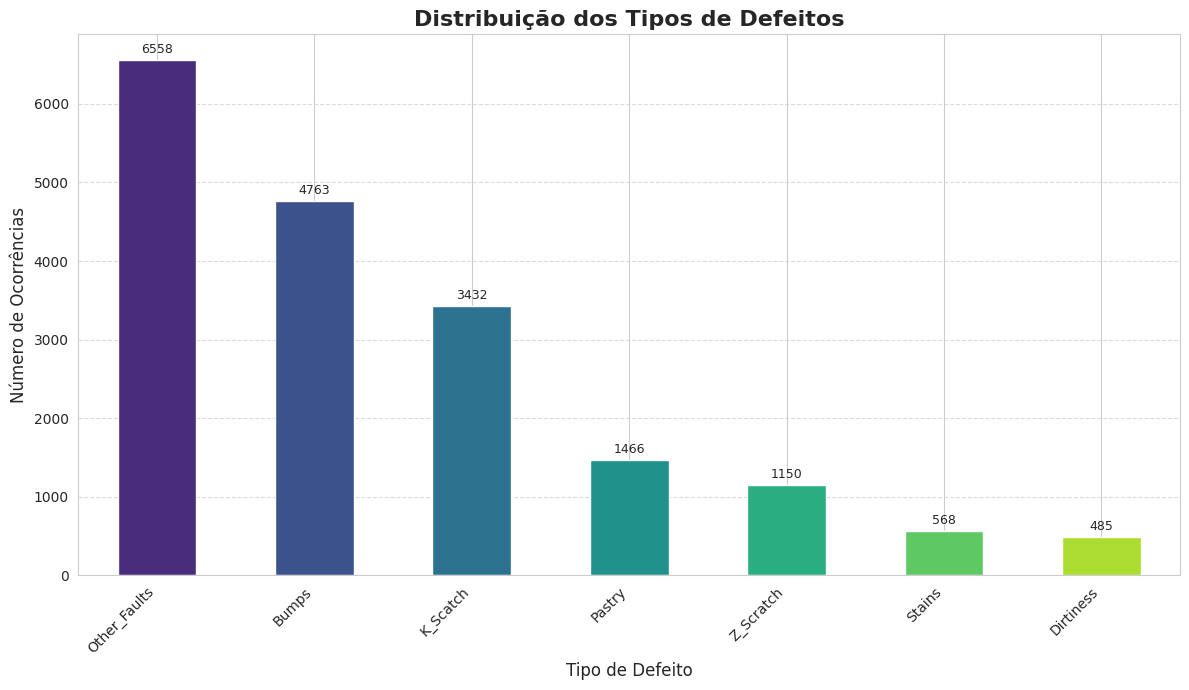


Distribuição dos defeitos (porcentagem de ocorrências):
Other_Faults    34.12%
Bumps           24.78%
K_Scatch        17.86%
Pastry           7.63%
Z_Scratch        5.98%
Stains           2.96%
Dirtiness        2.52%
dtype: object


In [23]:
"""
# Analisamos a frequência de cada tipo de defeito.
# Isso é importante para entender o desbalanceamento das classes, o que pode afetar o desempenho do modelo.
"""

if not y_eda.empty:
    print("\nDistribuição dos defeitos (contagem de ocorrências):")
    defect_occurrences = y_eda.sum().sort_values(ascending=False)
    print(defect_occurrences)

    plt.figure(figsize=(12, 7))
    bars = defect_occurrences.plot(kind='bar', color=sns.color_palette("viridis", len(defect_occurrences)))
    plt.title('Distribuição dos Tipos de Defeitos', fontsize=16, fontweight='bold')
    plt.xlabel('Tipo de Defeito', fontsize=12)
    plt.ylabel('Número de Ocorrências', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adicionando os valores no topo das barras
    for bar in bars.patches:
        plt.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height() + 50, # Offset para o texto não sobrepor a barra
                 round(bar.get_height(), 2),
                 ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()

    # Calculando a porcentagem de cada defeito
    print("\nDistribuição dos defeitos (porcentagem de ocorrências):")
    defect_percentages = (y_eda.sum() / len(y_eda) * 100).sort_values(ascending=False)
    print(defect_percentages.round(2).astype(str) + '%')

else:
    print("\nVariáveis alvo (y_eda) não definidas. Não é possível analisar a distribuição dos defeitos.")


A análise da distribuição dos defeitos mostra um claro **desbalanceamento entre as classes**:
* `Other_Faults` é o defeito mais frequente, com 6558 ocorrências (34.12%).
* Seguido por `Bumps` com 4763 ocorrências (24.78%) e `K_Scatch` com 3432 ocorrências (17.86%).
* Os defeitos menos comuns são `Dirtiness` (485 ocorrências, 2.52%) e `Stains` (568 ocorrências, 2.96%).
* `Pastry` (7.63%) e `Z_Scratch` (5.98%) estão em uma faixa intermediária-baixa.

Este desbalanceamento é uma característica importante. Modelos de machine learning tendem a ser enviesados para as classes majoritárias e podem ter dificuldade em aprender a identificar corretamente as classes minoritárias. Portanto, técnicas de reamostragem (como SMOTE para oversampling das classes minoritárias) ou o uso de pesos de classe podem ser considerados durante a fase de modelagem para mitigar esse problema e melhorar o desempenho para os defeitos menos frequentes.

2.3 Co-ocorrência de defeitos


Distribuição do número de defeitos por amostra:
Num_Defects
0      818
1    18380
2       21
Name: count, dtype: int64


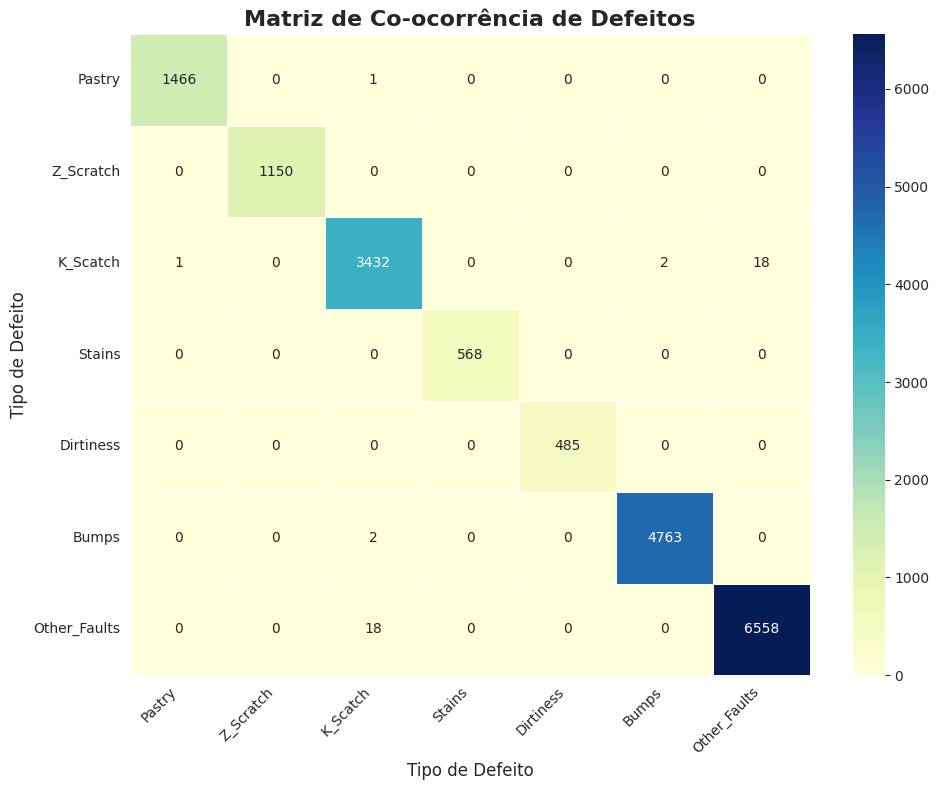


Total de amostras: 19219
Amostras com 0 defeitos: 818 (4.26%)
Amostras com 1 defeito: 18380 (95.63%)
Amostras com >1 defeito: 21 (0.11%)


In [24]:
"""
# Verificamos quantas vezes diferentes tipos de defeitos ocorrem simultaneamente na mesma chapa de aço.
# Isso pode indicar relações entre os defeitos.
"""

if not y_eda.empty:
    # Uma amostra pode ter múltiplos defeitos.
    steel_data['Num_Defects'] = y_eda.sum(axis=1)
    print("\nDistribuição do número de defeitos por amostra:")
    num_defects_counts = steel_data['Num_Defects'].value_counts().sort_index()
    print(num_defects_counts)

    # Matriz de co-ocorrência
    # Um valor na diagonal (i,i) é a contagem total do defeito i.
    # Um valor fora da diagonal (i,j) é o número de vezes que o defeito i e o defeito j ocorrem juntos.
    co_occurrence_matrix = y_eda.T.dot(y_eda)
    plt.figure(figsize=(10, 8))
    sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
    plt.title('Matriz de Co-ocorrência de Defeitos', fontsize=16, fontweight='bold')
    plt.xlabel('Tipo de Defeito', fontsize=12)
    plt.ylabel('Tipo de Defeito', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Análise mais aprofundada: porcentagem de amostras com múltiplos defeitos
    total_samples = len(steel_data)
    samples_with_zero_defects = num_defects_counts.get(0, 0)
    samples_with_one_defect = num_defects_counts.get(1, 0)
    samples_with_multiple_defects = total_samples - samples_with_zero_defects - samples_with_one_defect

    print(f"\nTotal de amostras: {total_samples}")
    print(f"Amostras com 0 defeitos: {samples_with_zero_defects} ({(samples_with_zero_defects/total_samples)*100:.2f}%)")
    print(f"Amostras com 1 defeito: {samples_with_one_defect} ({(samples_with_one_defect/total_samples)*100:.2f}%)")
    print(f"Amostras com >1 defeito: {samples_with_multiple_defects} ({(samples_with_multiple_defects/total_samples)*100:.2f}%)")

    # Limpar a coluna auxiliar
    steel_data.drop('Num_Defects', axis=1, inplace=True)

else:
    print("\nVariáveis alvo (y_eda) não definidas. Não é possível analisar a co-ocorrência.")


A análise da distribuição do número de defeitos por amostra revela o seguinte:
* **Amostras com 0 defeitos:** Existem 818 amostras (4.26%) que não apresentam nenhum dos 7 tipos de defeitos listados.
* **Amostras com 1 defeito:** A grande maioria, 18380 amostras (95.63%), possui exatamente um tipo de defeito.
* **Amostras com >1 defeito:** Um número muito pequeno, 21 amostras (0.11%), apresenta 2 defeitos simultaneamente. Não foram encontradas amostras com mais de 2 defeitos.

Isso indica que, embora o problema seja estruturado como multi-rótulo (devido às múltiplas colunas de target), na prática, a vasta maioria das chapas de aço neste dataset tem apenas um defeito identificado, ou nenhum. Apenas uma fração minúscula apresenta co-ocorrência de dois defeitos.
A matriz de co-ocorrência (visualizada no heatmap) mostra as contagens totais de cada defeito na diagonal. Os valores fora da diagonal indicam o número de vezes que dois defeitos específicos ocorrem juntos. Dado que apenas 21 amostras têm 2 defeitos, esses valores fora da diagonal serão pequenos, refletindo a baixa taxa de co-ocorrência real.
Para a modelagem, isso significa que, embora o `MultiOutputClassifier` seja uma abordagem adequada para lidar com as múltiplas colunas de target, a complexidade de prever múltiplas combinações de defeitos simultaneamente é relativamente baixa neste dataset específico.


2.4 Análise de features numéricas

In [25]:
"""
# Calculamos estatísticas descritivas (média, desvio padrão, mediana, quartis, mínimo, máximo) para as features numéricas.
# Isso ajuda a entender a escala e a dispersão de cada feature.
"""

if not X_eda.empty:
    print("\nEstatísticas Descritivas das Features Numéricas:")
    # Identificar colunas numéricas (excluindo 'id' que já está em feature_columns)
    numeric_feature_cols = X_eda.select_dtypes(include=np.number).columns.tolist()
    if 'id' in numeric_feature_cols: # Garantir que 'id' não está aqui, se X_eda foi criado sem ele
        numeric_feature_cols.remove('id')

    descriptive_stats = X_eda[numeric_feature_cols].describe().T
    display(descriptive_stats)
else:
    print("\nFeatures (X_eda) não definidas. Não é possível realizar análise descritiva.")


Estatísticas Descritivas das Features Numéricas:


,count,mean,std,min,25%,50%,75%,max
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02
Maximum_of_Luminosity,19219.0,1.286474e+02,1.419698e+01,39.0000,124.00000,1.270000e+02,1.350000e+02,2.530000e+02


Análise das estatísticas descritivas:

* **Escalas Variadas:** Confirma-se uma grande variação nas escalas. Por exemplo:
    * `Pixels_Areas` tem média de aprox. 1684, mas o máximo é 152655.
    * `Y_Minimum` e `Y_Maximum` têm valores na casa dos milhões.
    * Por outro lado, `Outside_X_Index` tem média 0.03 e máximo 0.66.
    * `TypeOfSteel_A300`/`A400` e `Outside_Global_Index` são binárias (min 0, max 1).
    Essa disparidade de escalas é uma forte justificativa para a **padronização (Standardization)** das features antes de aplicar algoritmos sensíveis à escala (como SVM, KNN, Redes Neurais ou modelos com regularização).

* **Dispersão (std):** Features como `Pixels_Areas` (std ≈ 3730), `Sum_of_Luminosity` (std ≈ 442025), `Y_Minimum` (std ≈ 1.9M) apresentam desvios padrão muito altos, indicando grande variabilidade nos dados e a presença de valores extremos (outliers), que também podem ser vistos comparando a média com a mediana (50%) e os quartis (25%, 75%).

* **Assimetria (Skewness) Potencial:** A diferença entre a média e a mediana (50º percentil) sugere assimetria em várias features:
    * `Pixels_Areas`: média 1683.99 vs mediana 168.00.
    * `X_Perimeter`: média 95.65 vs mediana 25.00.
    * `Sum_of_Luminosity`: média 191846.68 vs mediana 18238.00.
    Em todos esses casos, a média é significativamente maior que a mediana, indicando uma **assimetria positiva (à direita)**. Isso será confirmado na análise de distribuição.

* **Features Indicadoras/Logarítmicas:**
    * `TypeOfSteel_A300` e `TypeOfSteel_A400` (médias 0.40 e 0.60 respectivamente, com min 0 e max 1) confirmam sua natureza de indicadores.
    * Features como `LogOfAreas`, `Log_X_Index`, `Log_Y_Index` já estão em escala logarítmica, o que é uma técnica comum para lidar com assimetria e grandes ranges.

2.5 Distribuição das Features Numéricas


Distribuição de Features Numéricas (Histogramas e Boxplots):


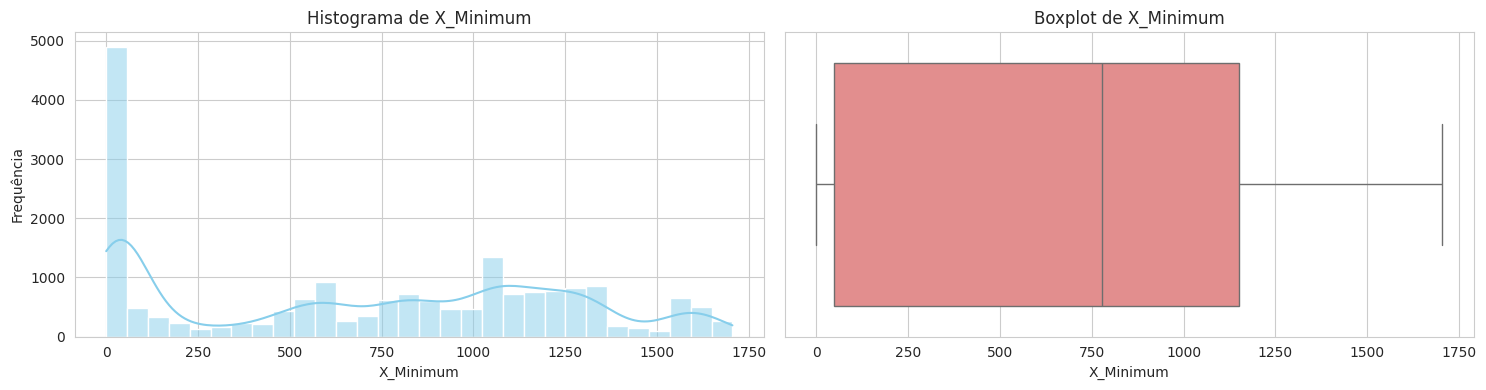

**Análise para X_Minimum:**
  Média: 709.85, Mediana: 777.00, Assimetria (Skewness): 0.02
  Distribuição aproximadamente simétrica.
--------------------------------------------------


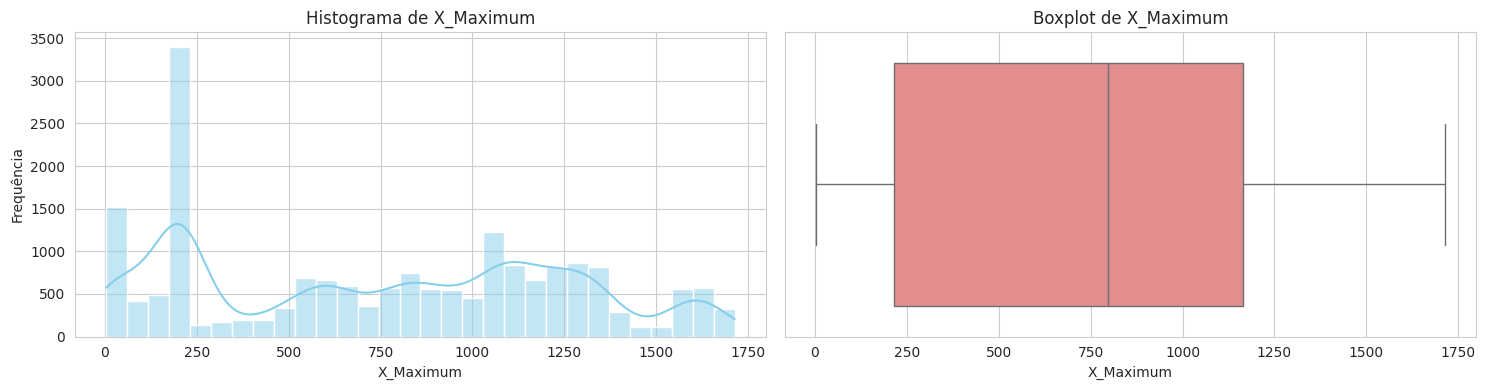

**Análise para X_Maximum:**
  Média: 753.86, Mediana: 796.00, Assimetria (Skewness): 0.07
  Distribuição aproximadamente simétrica.
--------------------------------------------------


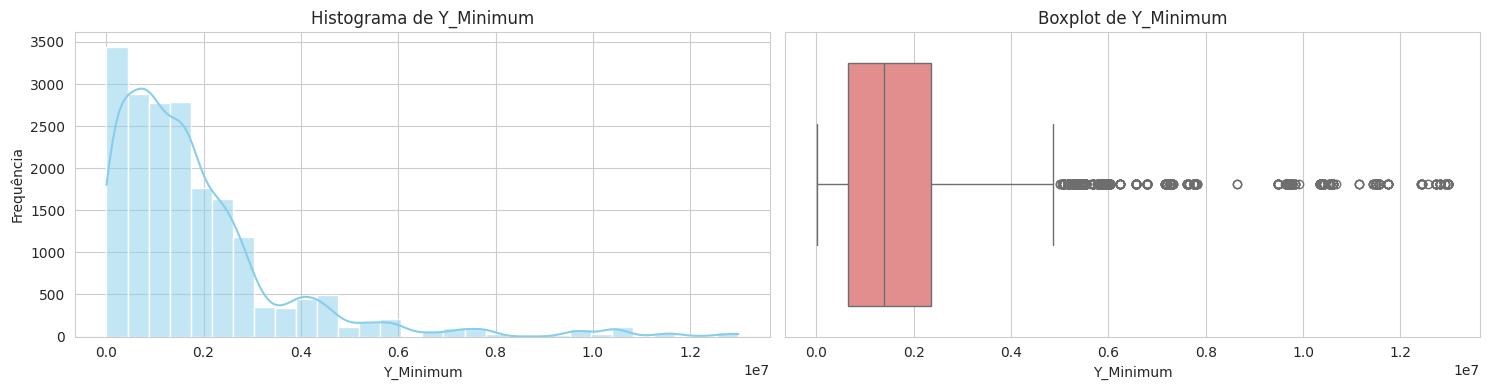

**Análise para Y_Minimum:**
  Média: 1849756.04, Mediana: 1398169.00, Assimetria (Skewness): 2.58
  Distribuição fortemente assimétrica à direita (positiva).
--------------------------------------------------


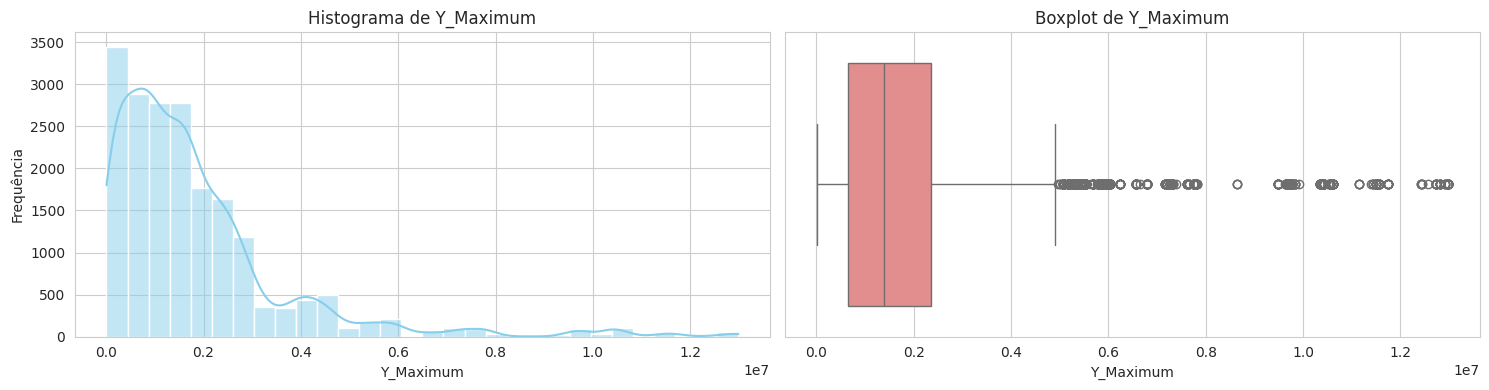

**Análise para Y_Maximum:**
  Média: 1846605.35, Mediana: 1398179.00, Assimetria (Skewness): 2.57
  Distribuição fortemente assimétrica à direita (positiva).
--------------------------------------------------


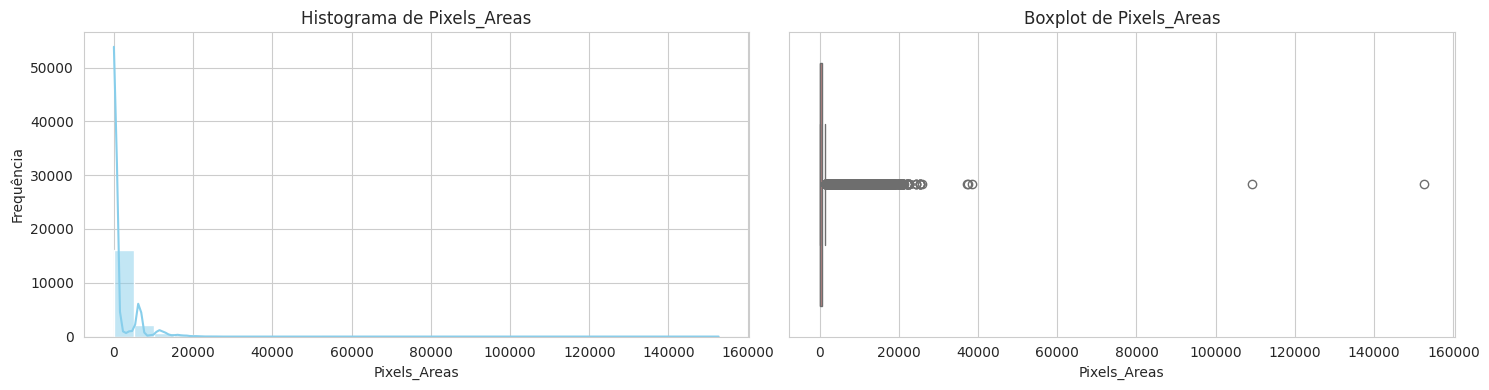

**Análise para Pixels_Areas:**
  Média: 1683.99, Mediana: 168.00, Assimetria (Skewness): 6.98
  Distribuição fortemente assimétrica à direita (positiva).
--------------------------------------------------


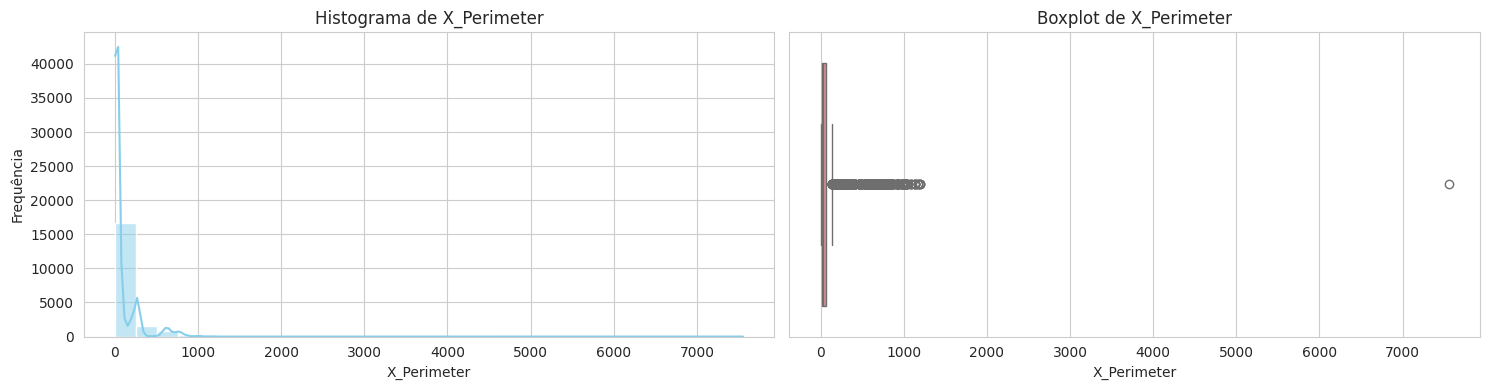

**Análise para X_Perimeter:**
  Média: 95.65, Mediana: 25.00, Assimetria (Skewness): 6.32
  Distribuição fortemente assimétrica à direita (positiva).
--------------------------------------------------


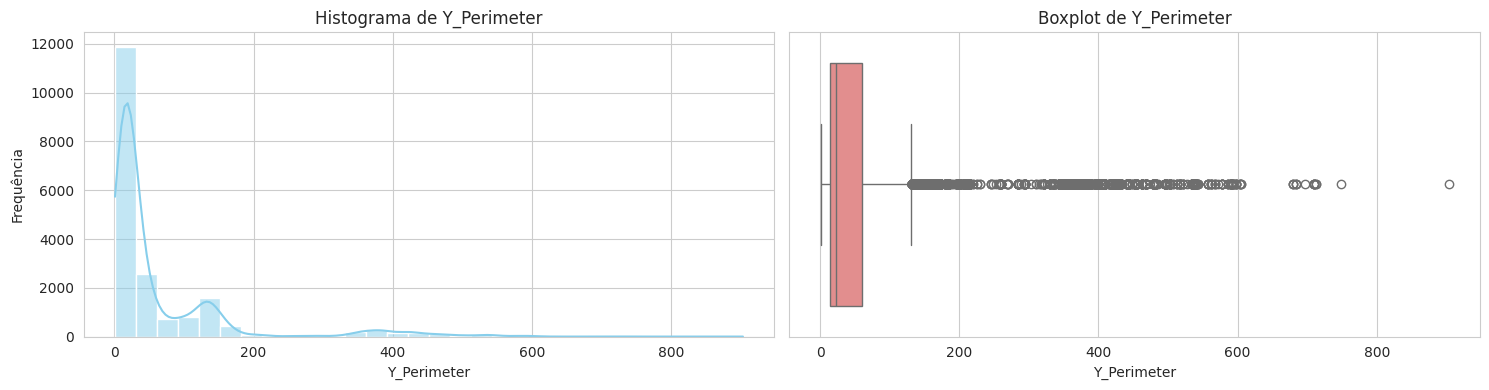

**Análise para Y_Perimeter:**
  Média: 64.12, Mediana: 23.00, Assimetria (Skewness): 2.98
  Distribuição fortemente assimétrica à direita (positiva).
--------------------------------------------------


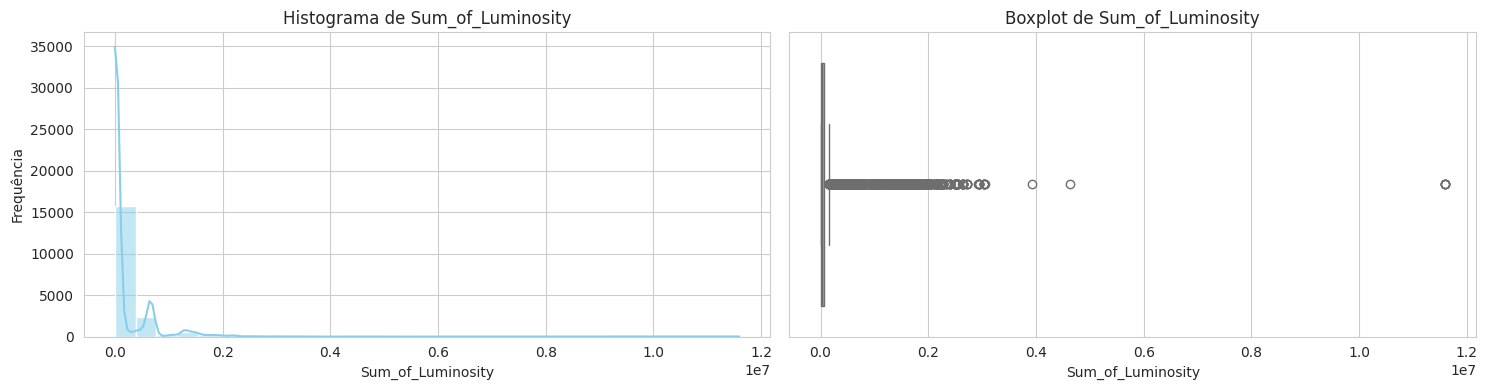

**Análise para Sum_of_Luminosity:**
  Média: 191846.68, Mediana: 18238.00, Assimetria (Skewness): 6.69
  Distribuição fortemente assimétrica à direita (positiva).
--------------------------------------------------


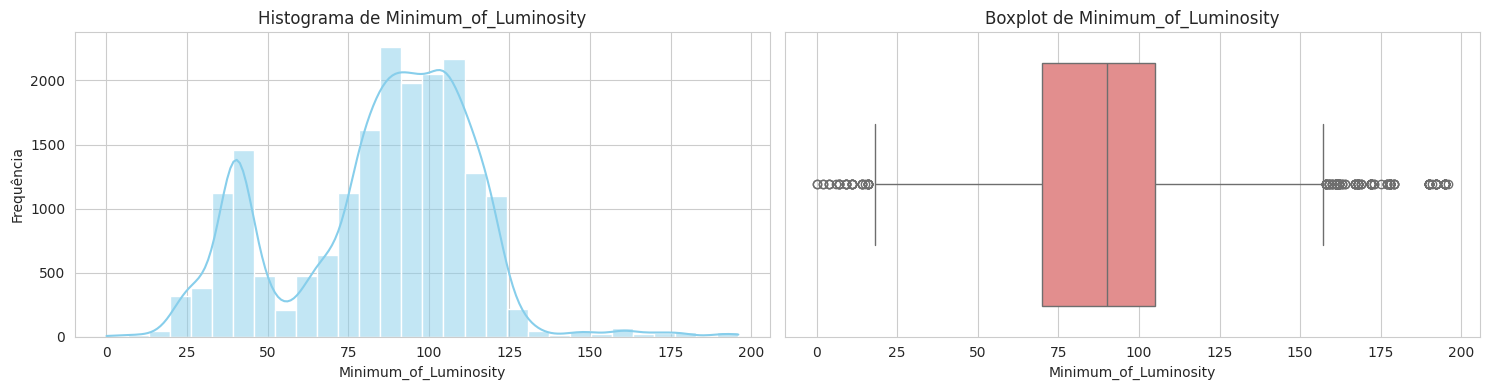

**Análise para Minimum_of_Luminosity:**
  Média: 84.81, Mediana: 90.00, Assimetria (Skewness): -0.33
  Distribuição aproximadamente simétrica.
--------------------------------------------------


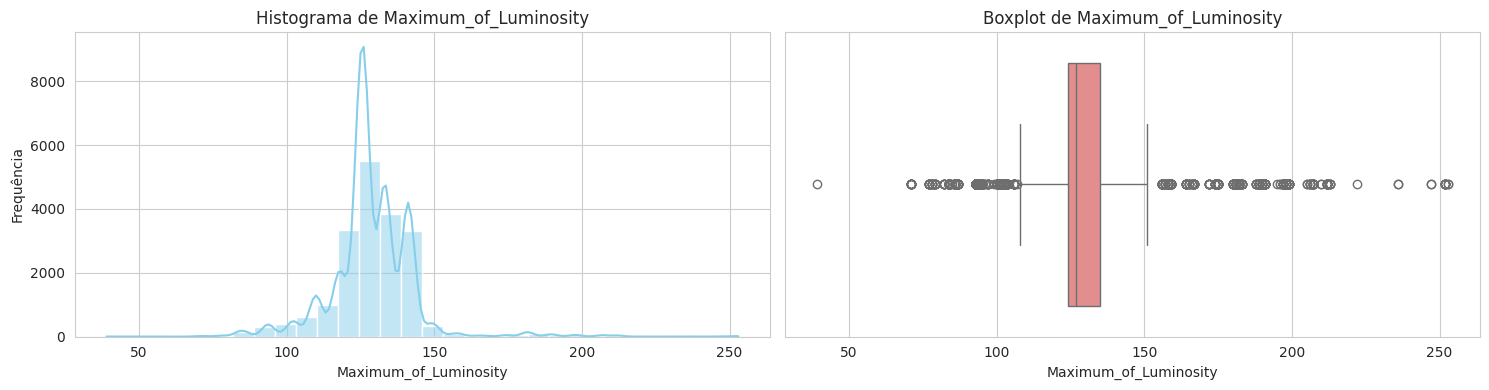

**Análise para Maximum_of_Luminosity:**
  Média: 128.65, Mediana: 127.00, Assimetria (Skewness): 1.17
  Distribuição fortemente assimétrica à direita (positiva).
--------------------------------------------------


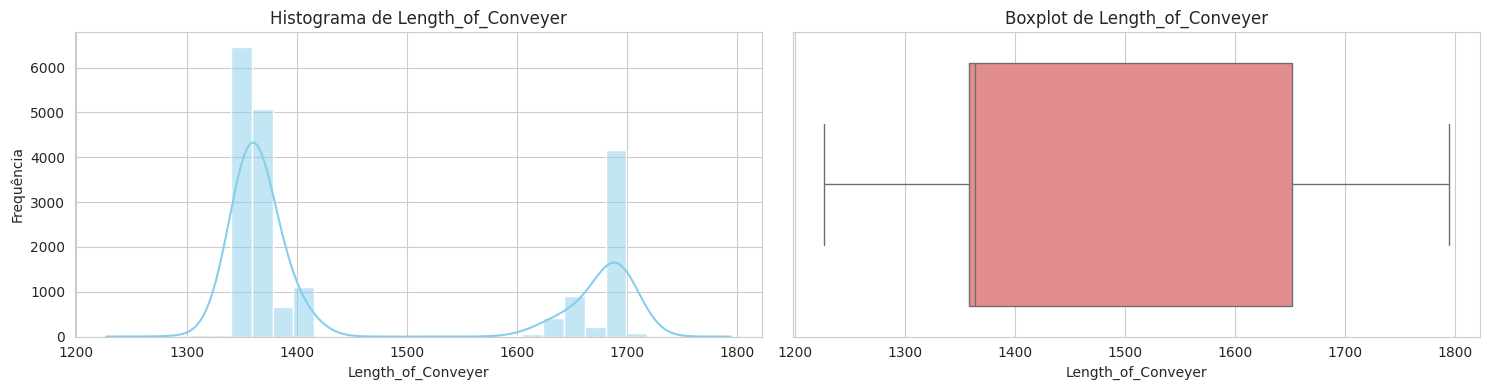

**Análise para Length_of_Conveyer:**
  Média: 1459.35, Mediana: 1364.00, Assimetria (Skewness): 0.86
  Distribuição moderadamente assimétrica.
--------------------------------------------------


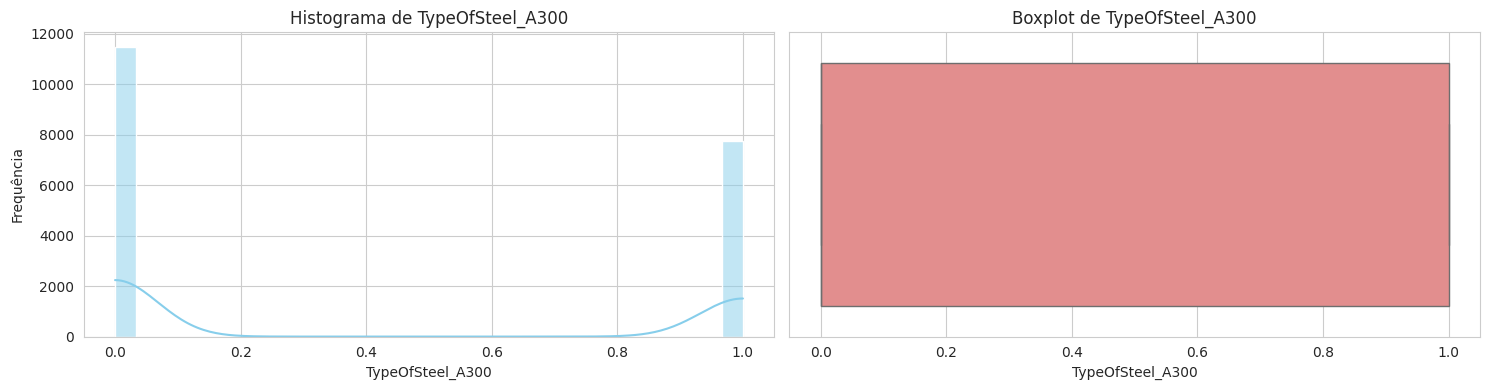

**Análise para TypeOfSteel_A300:**
  Média: 0.40, Mediana: 0.00, Assimetria (Skewness): 0.40
  Distribuição aproximadamente simétrica.
--------------------------------------------------


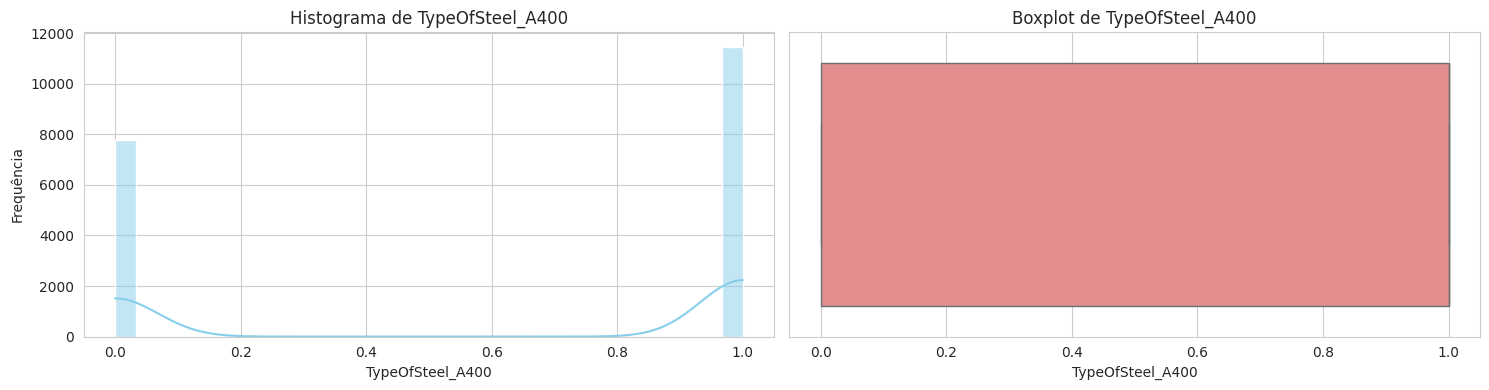

**Análise para TypeOfSteel_A400:**
  Média: 0.60, Mediana: 1.00, Assimetria (Skewness): -0.39
  Distribuição aproximadamente simétrica.
--------------------------------------------------


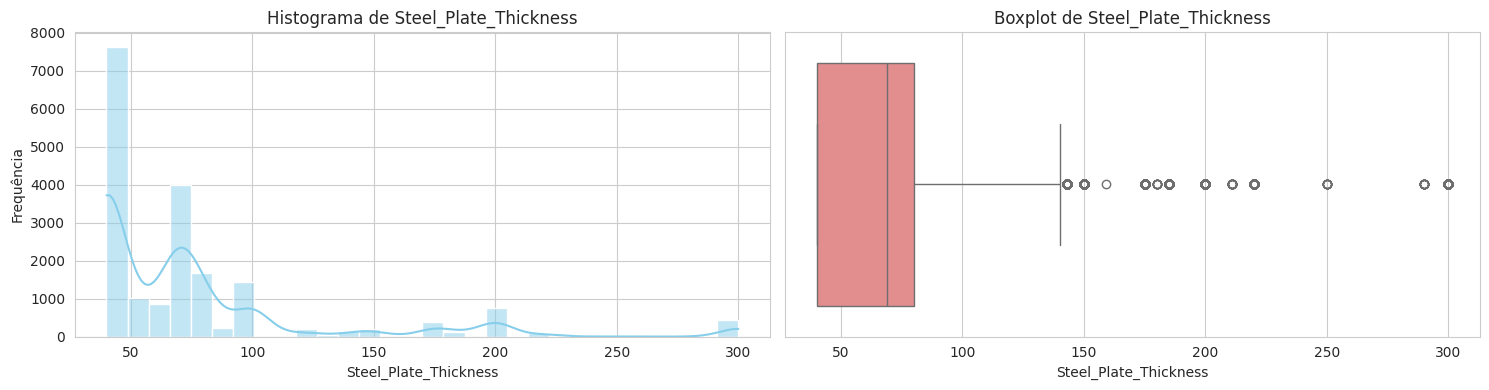

**Análise para Steel_Plate_Thickness:**
  Média: 76.21, Mediana: 69.00, Assimetria (Skewness): 2.36
  Distribuição fortemente assimétrica à direita (positiva).
--------------------------------------------------


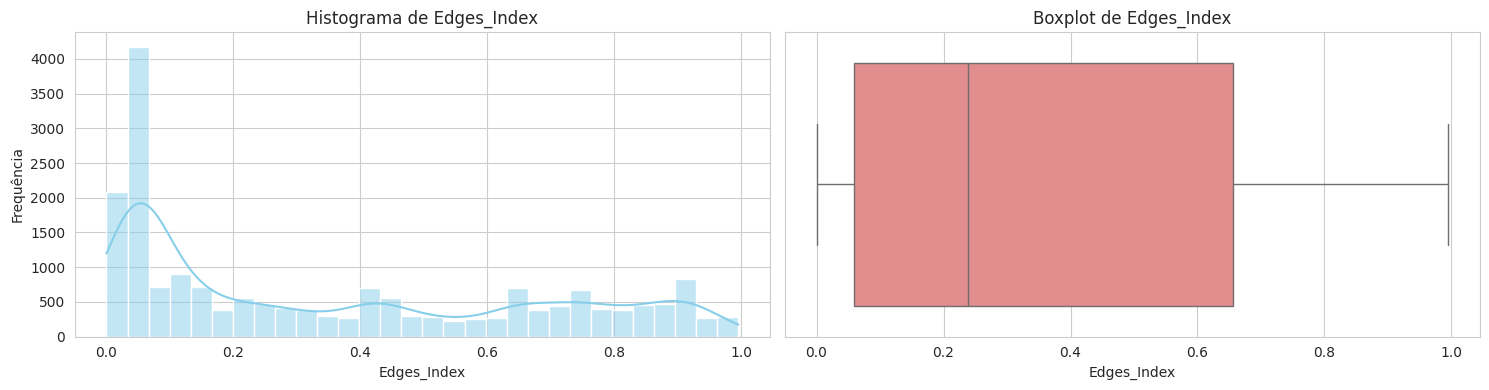

**Análise para Edges_Index:**
  Média: 0.35, Mediana: 0.24, Assimetria (Skewness): 0.54
  Distribuição moderadamente assimétrica.
--------------------------------------------------


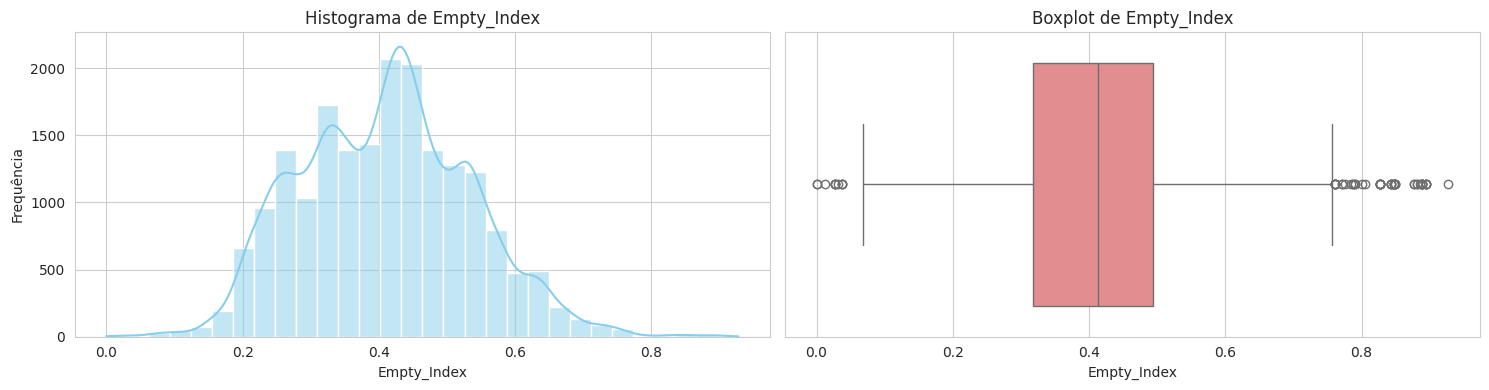

**Análise para Empty_Index:**
  Média: 0.41, Mediana: 0.41, Assimetria (Skewness): 0.20
  Distribuição aproximadamente simétrica.
--------------------------------------------------


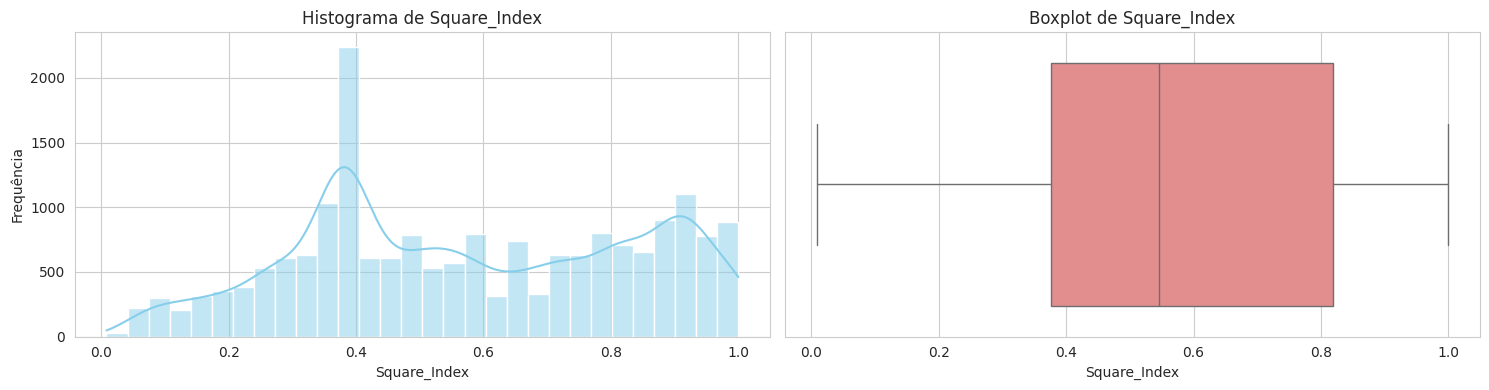

**Análise para Square_Index:**
  Média: 0.57, Mediana: 0.55, Assimetria (Skewness): 0.01
  Distribuição aproximadamente simétrica.
--------------------------------------------------


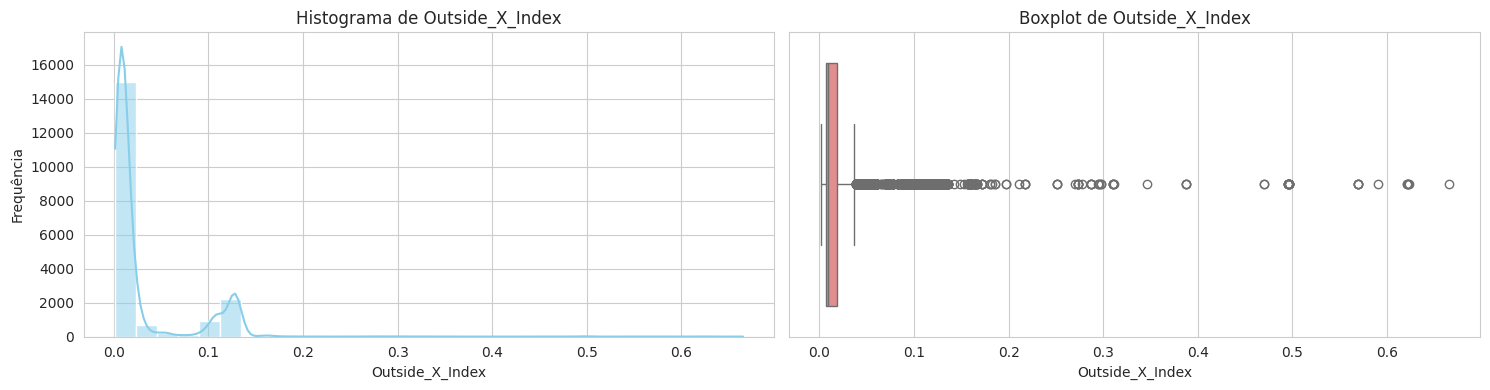

**Análise para Outside_X_Index:**
  Média: 0.03, Mediana: 0.01, Assimetria (Skewness): 3.12
  Distribuição fortemente assimétrica à direita (positiva).
--------------------------------------------------


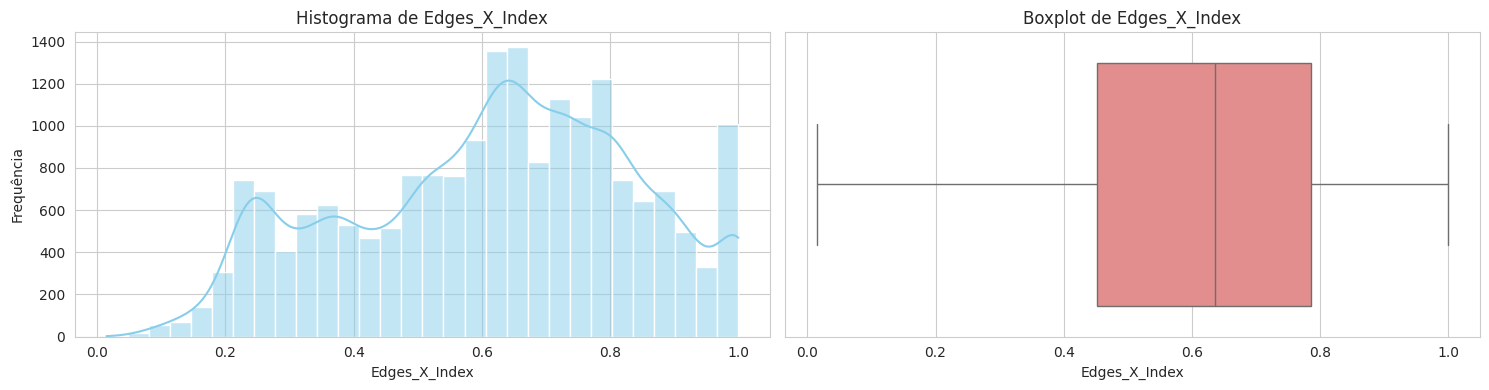

**Análise para Edges_X_Index:**
  Média: 0.61, Mediana: 0.64, Assimetria (Skewness): -0.25
  Distribuição aproximadamente simétrica.
--------------------------------------------------


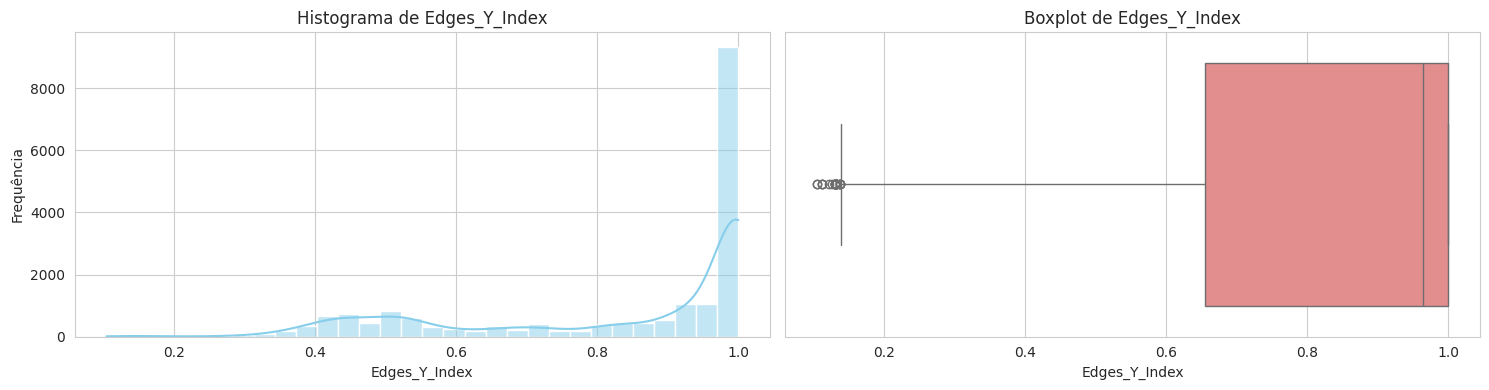

**Análise para Edges_Y_Index:**
  Média: 0.83, Mediana: 0.96, Assimetria (Skewness): -0.98
  Distribuição moderadamente assimétrica.
--------------------------------------------------


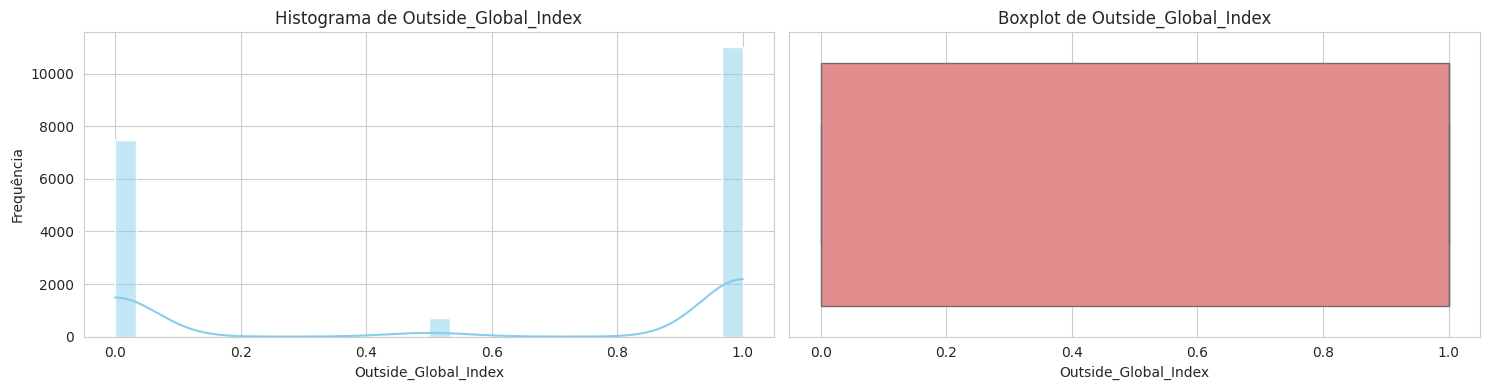

**Análise para Outside_Global_Index:**
  Média: 0.59, Mediana: 1.00, Assimetria (Skewness): -0.37
  Distribuição aproximadamente simétrica.
--------------------------------------------------


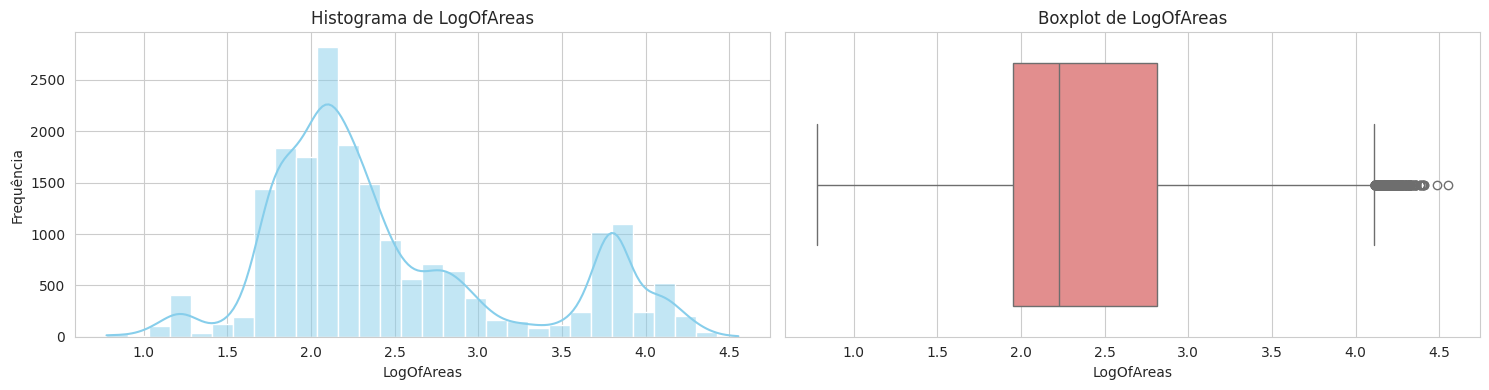

**Análise para LogOfAreas:**
  Média: 2.47, Mediana: 2.23, Assimetria (Skewness): 0.86
  Distribuição moderadamente assimétrica.
--------------------------------------------------


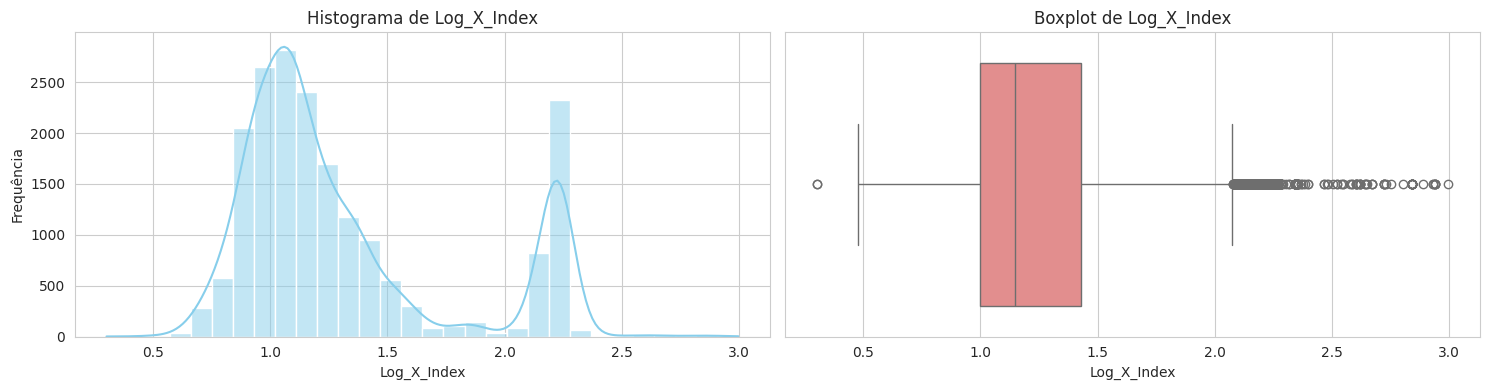

**Análise para Log_X_Index:**
  Média: 1.31, Mediana: 1.15, Assimetria (Skewness): 1.10
  Distribuição fortemente assimétrica à direita (positiva).
--------------------------------------------------


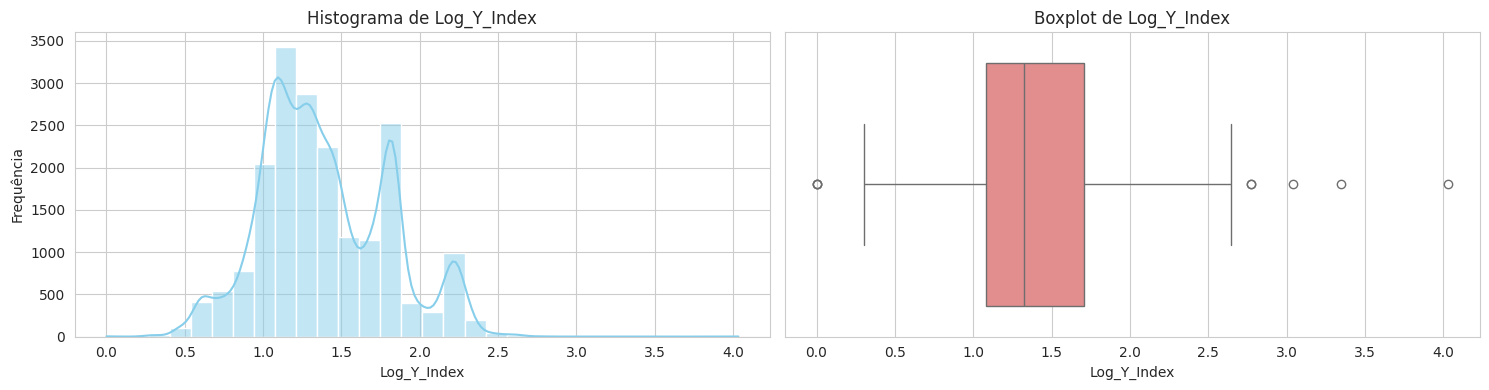

**Análise para Log_Y_Index:**
  Média: 1.39, Mediana: 1.32, Assimetria (Skewness): 0.39
  Distribuição aproximadamente simétrica.
--------------------------------------------------


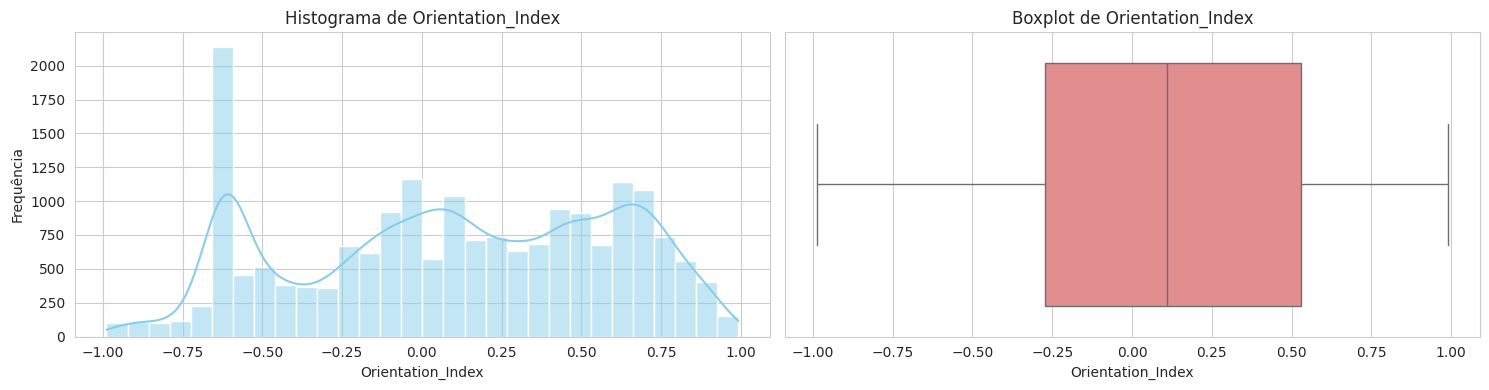

**Análise para Orientation_Index:**
  Média: 0.10, Mediana: 0.11, Assimetria (Skewness): -0.19
  Distribuição aproximadamente simétrica.
--------------------------------------------------


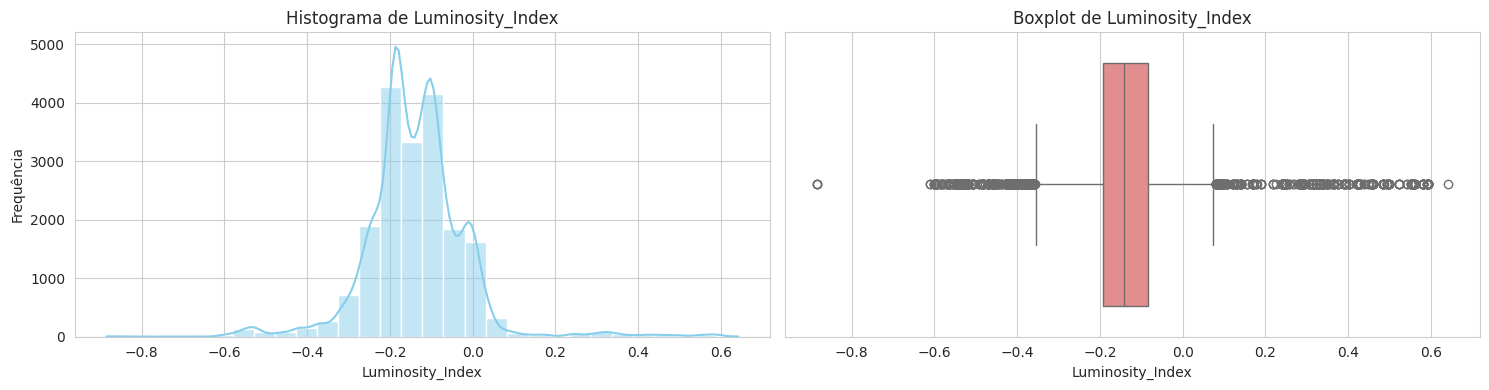

**Análise para Luminosity_Index:**
  Média: -0.14, Mediana: -0.14, Assimetria (Skewness): 0.78
  Distribuição moderadamente assimétrica.
--------------------------------------------------


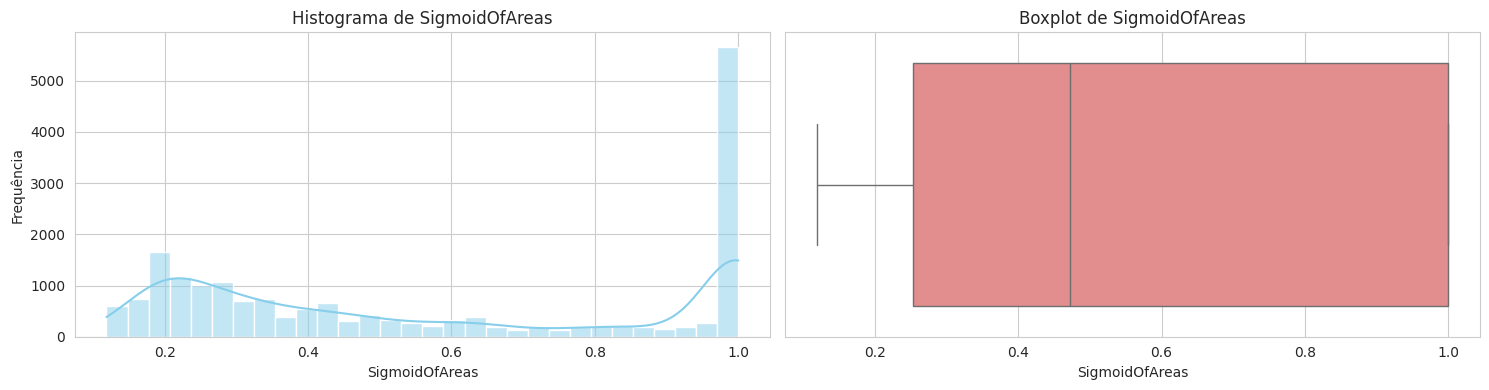

**Análise para SigmoidOfAreas:**
  Média: 0.57, Mediana: 0.47, Assimetria (Skewness): 0.22
  Distribuição aproximadamente simétrica.
--------------------------------------------------


In [26]:
"""
Visualizamos a distribuição de cada feature numérica usando histogramas e boxplots.
Isso ajuda a identificar assimetrias, outliers e a forma geral da distribuição.
"""

if not X_eda.empty and numeric_feature_cols:
    print("\nDistribuição de Features Numéricas (Histogramas e Boxplots):")
    for col in numeric_feature_cols:
        fig, axes = plt.subplots(1, 2, figsize=(15, 4))

        # Histograma
        sns.histplot(X_eda[col], kde=True, ax=axes[0], color='skyblue', bins=30)
        axes[0].set_title(f'Histograma de {col}', fontsize=12)
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequência')

        # Boxplot
        sns.boxplot(x=X_eda[col], ax=axes[1], color='lightcoral')
        axes[1].set_title(f'Boxplot de {col}', fontsize=12)
        axes[1].set_xlabel(col)

        plt.tight_layout()
        plt.show()

        # Análise textual breve para cada feature
        mean_val = X_eda[col].mean()
        median_val = X_eda[col].median()
        skewness = X_eda[col].skew()
        print(f"**Análise para {col}:**")
        print(f"  Média: {mean_val:.2f}, Mediana: {median_val:.2f}, Assimetria (Skewness): {skewness:.2f}")
        if skewness > 1:
            print(f"  Distribuição fortemente assimétrica à direita (positiva).")
        elif skewness < -1:
            print(f"  Distribuição fortemente assimétrica à esquerda (negativa).")
        elif abs(skewness) > 0.5:
            print(f"  Distribuição moderadamente assimétrica.")
        else:
            print(f"  Distribuição aproximadamente simétrica.")
        print("-" * 50)
else:
    print("\nFeatures numéricas não disponíveis para plotar distribuições.")

A análise da assimetria (Skewness) para cada feature numérica confirma e quantifica as observações da seção anterior:

* **Fortemente Assimétricas à Direita (Skewness > 1):**
    * `Y_Minimum` (Skewness: 2.58)
    * `Y_Maximum` (Skewness: 2.57)
    * `Pixels_Areas` (Skewness: 6.98)
    * `X_Perimeter` (Skewness: 6.32)
    * `Y_Perimeter` (Skewness: 2.98)
    * `Sum_of_Luminosity` (Skewness: 6.69)
    * `Maximum_of_Luminosity` (Skewness: 1.17)
    * `Steel_Plate_Thickness` (Skewness: 2.36)
    * `Outside_X_Index` (Skewness: 3.12)
    * `Log_X_Index` (Skewness: 1.10)
    Essas features têm uma cauda longa à direita, e a média é significativamente maior que a mediana. Transformações (como a logarítmica, já presente em `Log_X_Index`, `LogOfAreas`, `Log_Y_Index`) podem ser benéficas para modelos sensíveis à distribuição dos dados, embora as features logarítmicas ainda apresentem alguma assimetria (`LogOfAreas`: 0.86, `Log_X_Index`: 1.10). A forte assimetria em `Pixels_Areas` (6.98) justifica a existência de `LogOfAreas`.

* **Moderadamente Assimétricas (0.5 < |Skewness| <= 1):**
    * `Length_of_Conveyer` (Skewness: 0.86, à direita)
    * `Edges_Index` (Skewness: 0.54, à direita)
    * `Edges_Y_Index` (Skewness: -0.98, à esquerda)
    * `LogOfAreas` (Skewness: 0.86, à direita)
    * `Luminosity_Index` (Skewness: 0.78, à direita)

* **Aproximadamente Simétricas (|Skewness| <= 0.5):**
    * `X_Minimum` (Skewness: 0.02)
    * `X_Maximum` (Skewness: 0.07)
    * `Minimum_of_Luminosity` (Skewness: -0.33)
    * `TypeOfSteel_A300` (Skewness: 0.40)
    * `TypeOfSteel_A400` (Skewness: -0.39)
    * `Empty_Index` (Skewness: 0.20)
    * `Square_Index` (Skewness: 0.01)
    * `Edges_X_Index` (Skewness: -0.25)
    * `Outside_Global_Index` (Skewness: -0.37)
    * `Log_Y_Index` (Skewness: 0.39)
    * `Orientation_Index` (Skewness: -0.19)
    * `SigmoidOfAreas` (Skewness: 0.22)
    Essas features têm distribuições mais equilibradas em torno da média.

**Implicações:**
* A **padronização** (a ser feita no pré-processamento) é crucial devido aos ranges variados, independentemente da assimetria.
* Para features **fortemente assimétricas**, embora a padronização ajude com a escala, alguns modelos podem ainda se beneficiar de transformações específicas para reduzir a assimetria (ex: log, Box-Cox), se não forem já transformadas. No entanto, como muitas features já são índices ou transformações logarítmicas/sigmoides, procederemos com a padronização por enquanto.

2.6 Análise de Correlação entre Features Preditivas


Matriz de Correlação entre Features Preditivas:


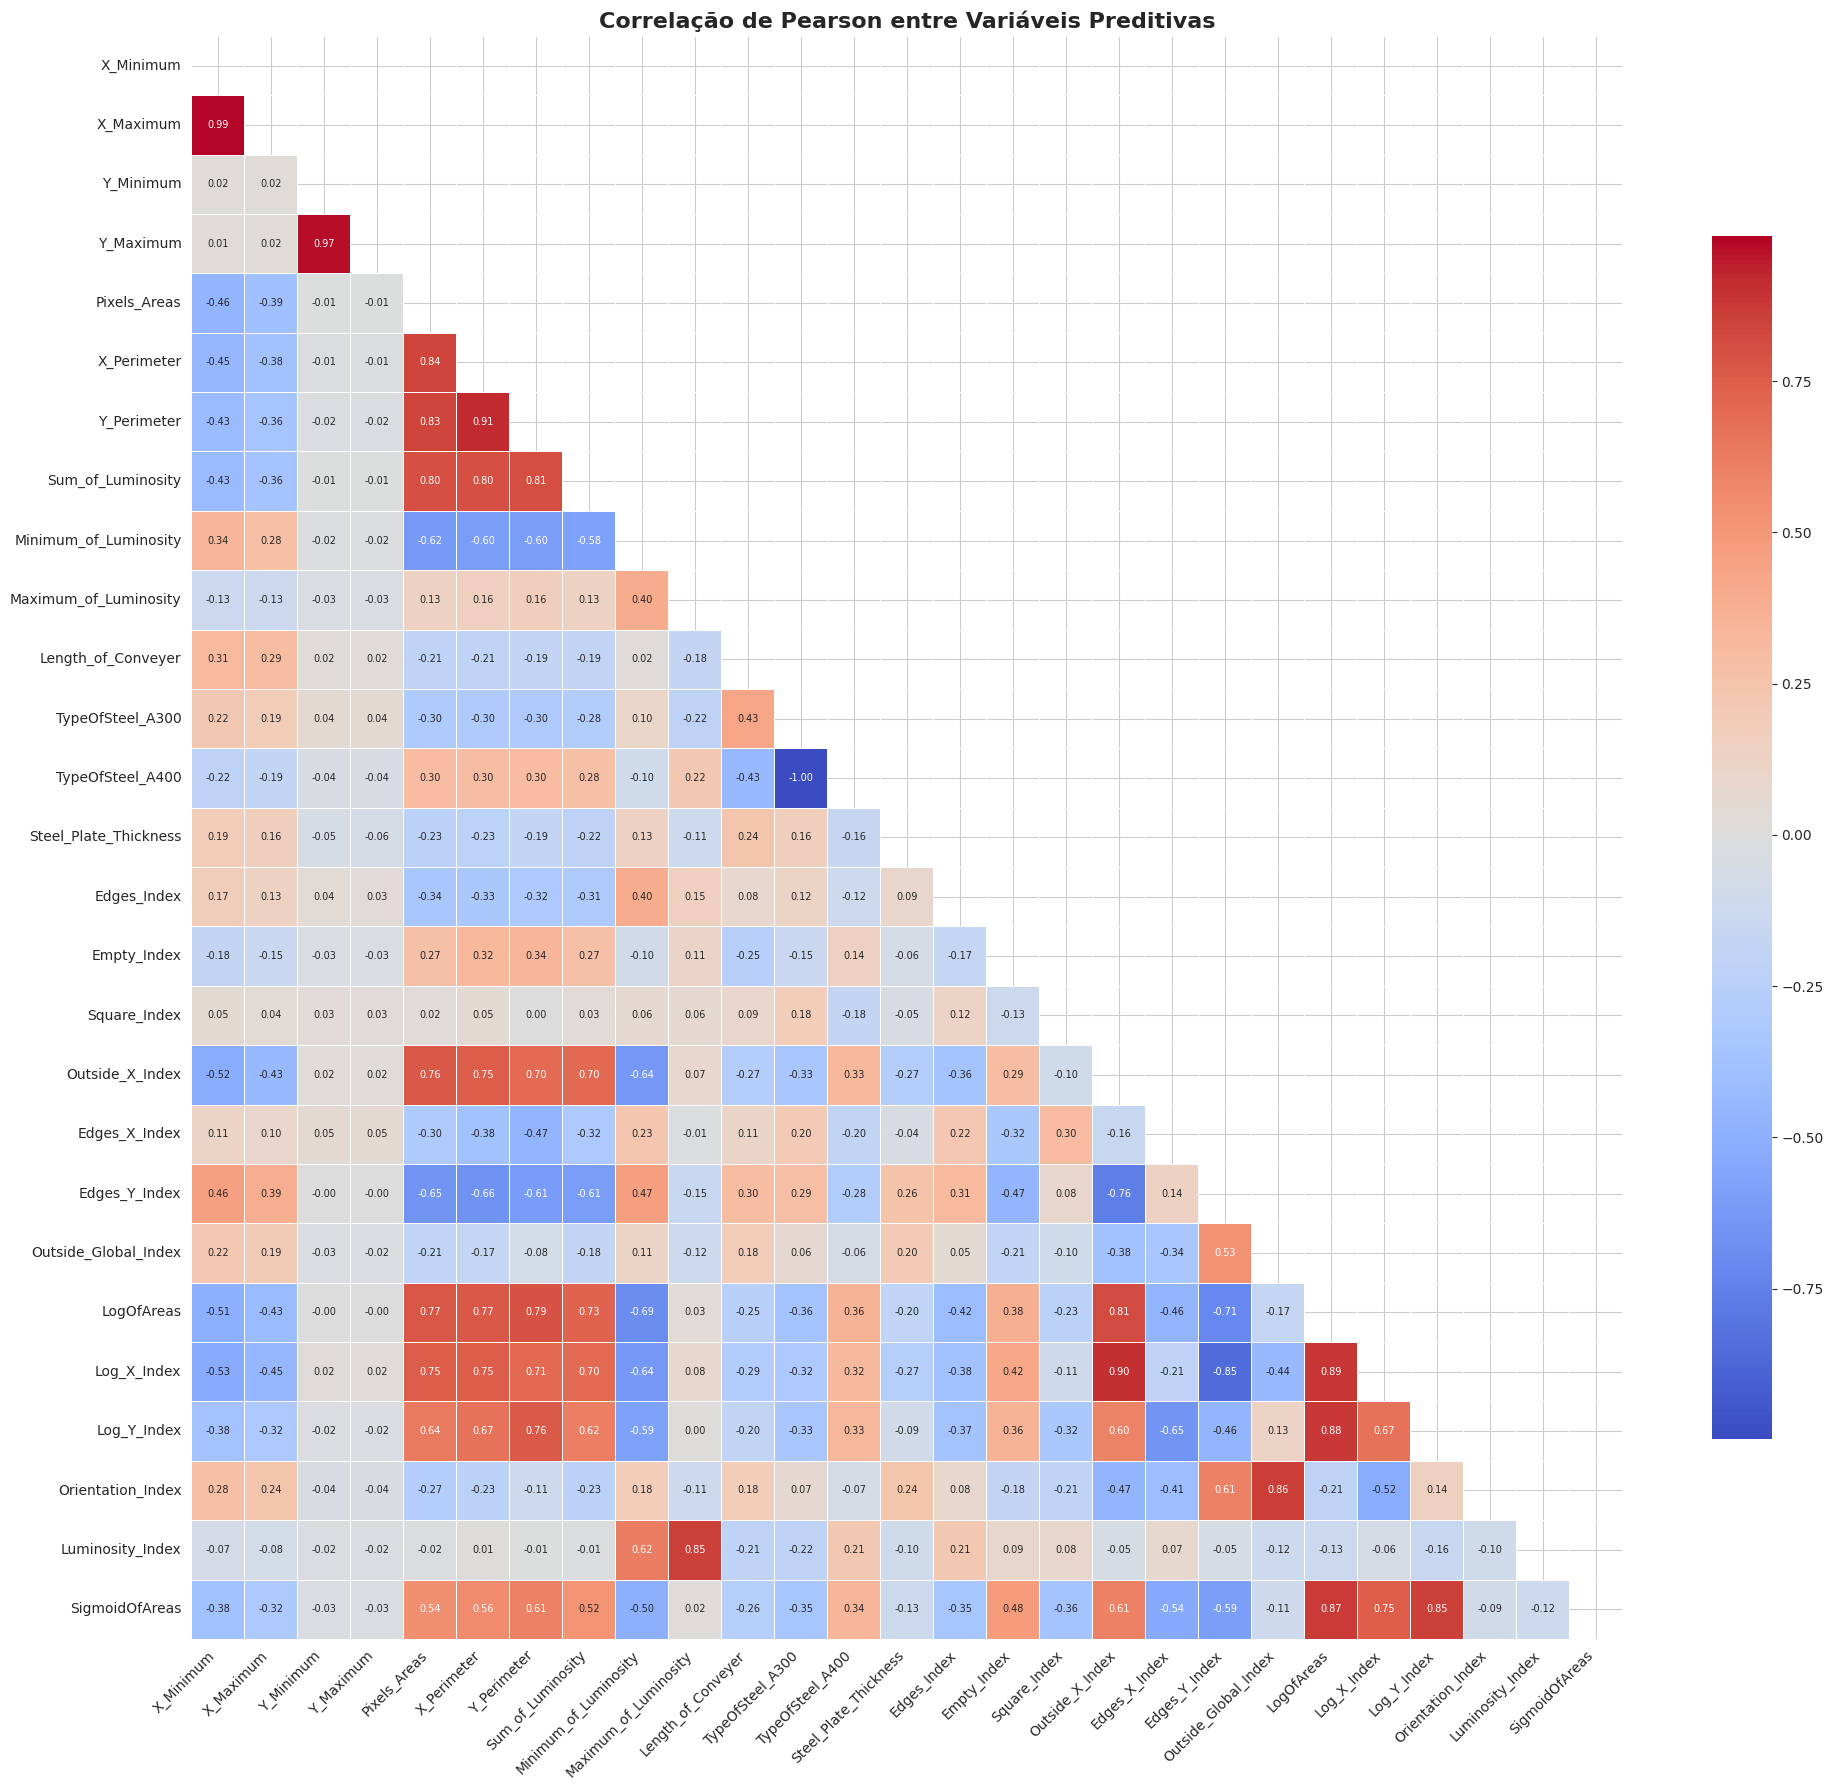


Pares de features com alta correlação (|corr| > 0.8):
  - X_Maximum e X_Minimum: 0.99
  - Y_Maximum e Y_Minimum: 0.97
  - X_Perimeter e Pixels_Areas: 0.84
  - Y_Perimeter e Pixels_Areas: 0.83
  - Y_Perimeter e X_Perimeter: 0.91
  - Sum_of_Luminosity e X_Perimeter: 0.80
  - Sum_of_Luminosity e Y_Perimeter: 0.81
  - TypeOfSteel_A400 e TypeOfSteel_A300: -1.00
  - LogOfAreas e Outside_X_Index: 0.81
  - Log_X_Index e Outside_X_Index: 0.90
  - Log_X_Index e Edges_Y_Index: -0.85
  - Log_X_Index e LogOfAreas: 0.89
  - Log_Y_Index e LogOfAreas: 0.88
  - Orientation_Index e Outside_Global_Index: 0.86
  - Luminosity_Index e Maximum_of_Luminosity: 0.85
  - SigmoidOfAreas e LogOfAreas: 0.87
  - SigmoidOfAreas e Log_Y_Index: 0.85


In [27]:
"""
Calculamos a matriz de correlação de Pearson para entender as relações lineares entre as features numéricas.
Correlações altas podem indicar multicolinearidade.
"""

if not X_eda.empty and numeric_feature_cols:
    print("\nMatriz de Correlação entre Features Preditivas:")
    # Excluindo 'id' se ainda estiver presente, embora já deva estar fora de numeric_feature_cols
    correlation_matrix = X_eda[numeric_feature_cols].corr()

    # Máscara para o triângulo superior
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    plt.figure(figsize=(20, 18)) # Aumentado para melhor visualização
    sns.heatmap(correlation_matrix,
                mask=mask,
                cmap='coolwarm',
                annot=True,
                annot_kws={"size": 7},
                fmt=".2f",
                linewidths=0.5,
                square=False,
                cbar_kws={"shrink": .75})
    plt.title("Correlação de Pearson entre Variáveis Preditivas", fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Identificando pares altamente correlacionados (exemplo com limiar > 0.8 ou < -0.8)
    highly_correlated_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.8:
                pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
                highly_correlated_pairs.append(pair)

    if highly_correlated_pairs:
        print("\nPares de features com alta correlação (|corr| > 0.8):")
        for pair in highly_correlated_pairs:
            print(f"  - {pair[0]} e {pair[1]}: {pair[2]:.2f}")
    else:
        print("\nNenhum par de features com correlação absoluta > 0.8 encontrado.")

else:
    print("\nFeatures numéricas não disponíveis para calcular correlação.")

A análise da matriz de correlação, e especificamente a lista de pares com correlação absoluta maior que 0.8, revela informações importantes sobre multicolinearidade:

* **Correlações Perfeitas ou Quase Perfeitas:**
    * `X_Maximum` e `X_Minimum`: **0.99**. Estas features são quase idênticas em termos de informação linear, indicando que uma delas pode ser redundante.
    * `Y_Maximum` e `Y_Minimum`: **0.97**. Similar ao caso anterior para a dimensão Y.
    * `TypeOfSteel_A400` e `TypeOfSteel_A300`: **-1.00**. Correlação negativa perfeita. Isso confirma que são mutuamente exclusivas: se uma é 1, a outra é 0. Elas representam efetivamente uma única variável categórica.

* **Correlações Fortes (>0.8):**
    * Entre features de tamanho/área: `X_Perimeter` e `Pixels_Areas` (0.84), `Y_Perimeter` e `Pixels_Areas` (0.83), `Y_Perimeter` e `X_Perimeter` (0.91). Isso é esperado, pois áreas maiores tendem a ter perímetros maiores.
    * Entre `Sum_of_Luminosity` e perímetros: `Sum_of_Luminosity` e `X_Perimeter` (0.80), `Sum_of_Luminosity` e `Y_Perimeter` (0.81).
    * Entre features logarítmicas e outras:
        * `LogOfAreas` e `Outside_X_Index` (0.81)
        * `Log_X_Index` e `Outside_X_Index` (0.90)
        * `Log_X_Index` e `LogOfAreas` (0.89)
        * `Log_Y_Index` e `LogOfAreas` (0.88)
        * `SigmoidOfAreas` e `LogOfAreas` (0.87)
        * `SigmoidOfAreas` e `Log_Y_Index` (0.85)
    * Outras: `Orientation_Index` e `Outside_Global_Index` (0.86), `Luminosity_Index` e `Maximum_of_Luminosity` (0.85).
    * Correlação negativa forte: `Log_X_Index` e `Edges_Y_Index` (-0.85).

**Implicações da Multicolinearidade:**
* A presença de tantas features altamente correlacionadas sugere **multicolinearidade significativa**.
* Para modelos como regressão linear, isso pode inflacionar a variância dos coeficientes e dificultar a interpretação da importância individual das features.
* Modelos baseados em árvores (como Random Forest, Gradient Boosting) são geralmente menos afetados negativamente pela multicolinearidade em termos de performance preditiva, mas a interpretação da importância das features ainda pode ser um pouco distribuída entre as features correlacionadas.
* A **seleção de features** (realizada na seção 4) ajudará a mitigar isso, potencialmente removendo algumas das features redundantes. Técnicas como Análise de Componentes Principais (PCA) também poderiam ser consideradas se a multicolinearidade se mostrar um problema persistente para os modelos escolhidos.

2.7 Análise de Outliers

In [28]:
"""
Identificamos outliers usando o método IQR (Intervalo Interquartil).
Um outlier é um ponto de dados que difere significativamente de outras observações.
Q1 = 25º percentil, Q3 = 75º percentil, IQR = Q3 - Q1
Limite Inferior = Q1 - 1.5 * IQR
Limite Superior = Q3 + 1.5 * IQR
"""

if not X_eda.empty and 'numeric_feature_cols' in locals() and numeric_feature_cols:
    print("\nAnálise de Outliers (Método IQR):")
    outlier_info = {}
    outliers_data_dict = {} # Para armazenar os dataframes de outliers

    for col in numeric_feature_cols:
        Q1 = X_eda[col].quantile(0.25)
        Q3 = X_eda[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        current_outliers = X_eda[(X_eda[col] < lower_bound) | (X_eda[col] > upper_bound)]
        outliers_data_dict[col] = current_outliers

        num_outliers = current_outliers.shape[0]
        percentage_outliers = (num_outliers / X_eda.shape[0]) * 100

        outlier_info[col] = {
            "Qtd Outliers": num_outliers,
            "Porcentagem Outliers (%)": round(percentage_outliers, 2),
            "Limite Inferior (IQR)": round(lower_bound, 2),
            "Limite Superior (IQR)": round(upper_bound, 2),
            "Mínimo Real": X_eda[col].min(),
            "Máximo Real": X_eda[col].max()
        }

    outliers_df = pd.DataFrame(outlier_info).T.sort_values(by="Qtd Outliers", ascending=False)
    print("\nResumo de outliers por feature:")
    display(outliers_df)
else:
    print("\nFeatures numéricas não disponíveis para análise de outliers.")


Análise de Outliers (Método IQR):

Resumo de outliers por feature:


,Qtd Outliers,Porcentagem Outliers (%),Limite Inferior (IQR),Limite Superior (IQR),Mínimo Real,Máximo Real
Sum_of_Luminosity,3826.0,19.91,-77347.00,155173.00,250.0000,1.159141e+07
Pixels_Areas,3722.0,19.37,-757.00,1499.00,6.0000,1.526550e+05
X_Perimeter,3717.0,19.34,-58.50,137.50,2.0000,7.553000e+03
Outside_X_Index,3641.0,18.94,-0.01,0.04,0.0015,6.651000e-01
Log_X_Index,3325.0,17.30,0.35,2.08,0.3010,2.997300e+00
Y_Perimeter,2785.0,14.49,-56.50,131.50,1.0000,9.030000e+02
Steel_Plate_Thickness,2173.0,11.31,-20.00,140.00,40.0000,3.000000e+02
Maximum_of_Luminosity,1292.0,6.72,107.50,151.50,39.0000,2.530000e+02
Y_Minimum,1118.0,5.82,-1908378.00,4933878.00,6712.0000,1.298766e+07
Y_Maximum,1112.0,5.79,-1900011.50,4920024.50,6724.0000,1.298769e+07


A análise de outliers pelo método IQR revela que várias features possuem uma quantidade significativa de valores considerados extremos. Essas features mostram uma cauda de distribuição que se estende bem além dos limites do IQR, o que é consistente com as altas taxas de assimetria observadas anteriormente para muitas delas.

# 3. PRÉ-PROCESSAMENTO DOS DADOS

**Análise Textual (Observações da Relação Feature-Target):**
Ao observar os boxplots comparando as distribuições das features para amostras com e sem cada tipo de defeito:
* **Poder Discriminatório**: Algumas features mostrarão medianas, quartis ou ranges visivelmente diferentes entre as classes "Defeito Presente" e "Defeito Ausente" para um determinado tipo de defeito. Isso sugere que essas features têm poder discriminatório para aquele defeito específico.
* **Variação por Defeito**: Uma feature pode ser muito importante para identificar um tipo de defeito, mas menos relevante para outro. É por isso que a abordagem `MultiOutputClassifier` (treinando um classificador por target) pode ser eficaz.
* **Exemplos Hipotéticos de Observação**:
    * Para o defeito `Pastry`, a feature `Pixels_Areas` pode mostrar valores consistentemente menores quando o defeito está presente.
    * Para o defeito `Bumps`, a feature `Steel_Plate_Thickness` pode apresentar uma distribuição diferente em comparação com a ausência de `Bumps`.
    * O `Luminosity_Index` pode ser mais baixo para defeitos do tipo `Stains`.

Essa análise visual ajuda a confirmar a relevância das features e pode guiar a seleção de features ou a engenharia de features mais direcionada. As features que mostram separação clara são bons candidatos para os modelos.

Nesta etapa, preparamos os dados para a modelagem. Isso inclui:
1.  Remoção de colunas irrelevantes.
2.  Tratamento de valores nulos (se houver, e se decidido).
3.  Engenharia de features (se aplicável e benéfico).
4.  Normalização/Padronização de features numéricas.


3.1 Remoção de colunas não relevantes

In [29]:
"""
# A coluna `id` é um identificador único para cada amostra e não possui valor preditivo.
# Portanto, deve ser removida.
"""

if not steel_data.empty:
    if 'id' in steel_data.columns:
        print("\nRemovendo a coluna 'id'...")
        steel_data.drop('id', axis=1, inplace=True)
        print("Coluna 'id' removida.")
        # Atualizar a lista de feature_columns se necessário
        if 'id' in feature_columns:
            feature_columns.remove('id')
        if 'id' in numeric_feature_cols:
            numeric_feature_cols.remove('id') # numeric_feature_cols já não deve ter targets
    else:
        print("\nColuna 'id' não encontrada ou já removida.")
else:
    print("\nDataset vazio. Nenhuma coluna para remover.")


Removendo a coluna 'id'...
Coluna 'id' removida.


3.2 Tratamento de valores nulos (Features)

In [30]:
"""
# Conforme verificado na EDA, nosso dataset de treino não possui valores nulos.
# No entanto, para robustez em um pipeline de produção (que lidaria com `test.csv` ou novos dados), incluiríamos um passo de imputação.
# Usaríamos a mediana para imputar, pois é robusta a outliers.
"""

"""if not steel_data.empty and numeric_feature_cols:
    # Como não há nulos, esta etapa não alterará os dados, mas é demonstrativa.
    print("\nConfigurando o imputer para features numéricas (estratégia: mediana):")
    # Selecionar apenas as features numéricas que não são targets
    numerical_features_for_imputation = [col for col in numeric_feature_cols if col not in defect_columns]

    if steel_data[numerical_features_for_imputation].isnull().sum().sum() > 0:
        imputer = SimpleImputer(strategy='median')
        steel_data[numerical_features_for_imputation] = imputer.fit_transform(steel_data[numerical_features_for_imputation])
        print("Imputação aplicada (embora não houvesse nulos nas features do train.csv).")
    else:
        print("Nenhum valor nulo encontrado nas features numéricas para imputar.")

    # Verifica se ainda há valores nulos (deve ser zero para as features processadas)
    print("\nValores nulos nas features numéricas após tentativa de tratamento:")
    print(steel_data[numerical_features_for_imputation].isnull().sum())
else:
    print("\nDataset ou features numéricas não disponíveis para tratamento de nulos.")"""


Configurando o imputer para features numéricas (estratégia: mediana):
Nenhum valor nulo encontrado nas features numéricas para imputar.

Valores nulos nas features numéricas após tentativa de tratamento:
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64


3.3 Engenharia de features

In [31]:
"""
# Para fins de EDA, criamos `Total_Defects` e `Has_Defect`.
# Essas features ajudam a entender o dataset, mas não serão usadas diretamente como preditores se o objetivo é
prever cada um dos 7 defeitos individualmente.
"""
if not steel_data.empty and all(col in steel_data.columns for col in defect_columns):
    steel_data['Total_Defects'] = steel_data[defect_columns].sum(axis=1)
    steel_data['Has_Defect'] = (steel_data['Total_Defects'] > 0).astype(int)

    print("\nAnálise de múltiplos defeitos por amostra (baseado em 'Total_Defects'):")
    print(f"Número de amostras com 0 defeitos: {(steel_data['Total_Defects'] == 0).sum()}")
    print(f"Número de amostras com 1 defeito: {(steel_data['Total_Defects'] == 1).sum()}")
    print(f"Número de amostras com >1 defeito: {(steel_data['Total_Defects'] > 1).sum()}")
    print(f"Valor máximo de 'Total_Defects' em uma amostra: {steel_data['Total_Defects'].max()}")

    if 'Total_Defects' in numeric_feature_cols: numeric_feature_cols.remove('Total_Defects')
    if 'Has_Defect' in numeric_feature_cols: numeric_feature_cols.remove('Has_Defect')

else:
    print("\nDataset ou colunas de defeito não disponíveis para engenharia de features.")


Análise de múltiplos defeitos por amostra (baseado em 'Total_Defects'):
Número de amostras com 0 defeitos: 818
Número de amostras com 1 defeito: 18380
Número de amostras com >1 defeito: 21
Valor máximo de 'Total_Defects' em uma amostra: 2


3.4 Normalização/Padronização de Features Numéricas

Muitos algoritmos de Machine Learning (como SVM, KNN, Redes Neurais e aqueles que usam regularização) são sensíveis à escala das features de entrada. A padronização transforma os dados para que tenham média 0 e desvio padrão 1.

A fórmula é: $z = \frac{(x - \mu)}{\sigma}$
Onde:
* $x$ é o valor original da feature.
* $\mu$ é a média da feature.
* $\sigma$ é o desvio padrão da feature.
* $z$ é o valor padronizado.

Isso garante que todas as features contribuam de forma mais equitativa para o processo de aprendizado, evitando que features com valores numericamente maiores dominem as outras.


Padronizando as seguintes 27 features numéricas:
['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']


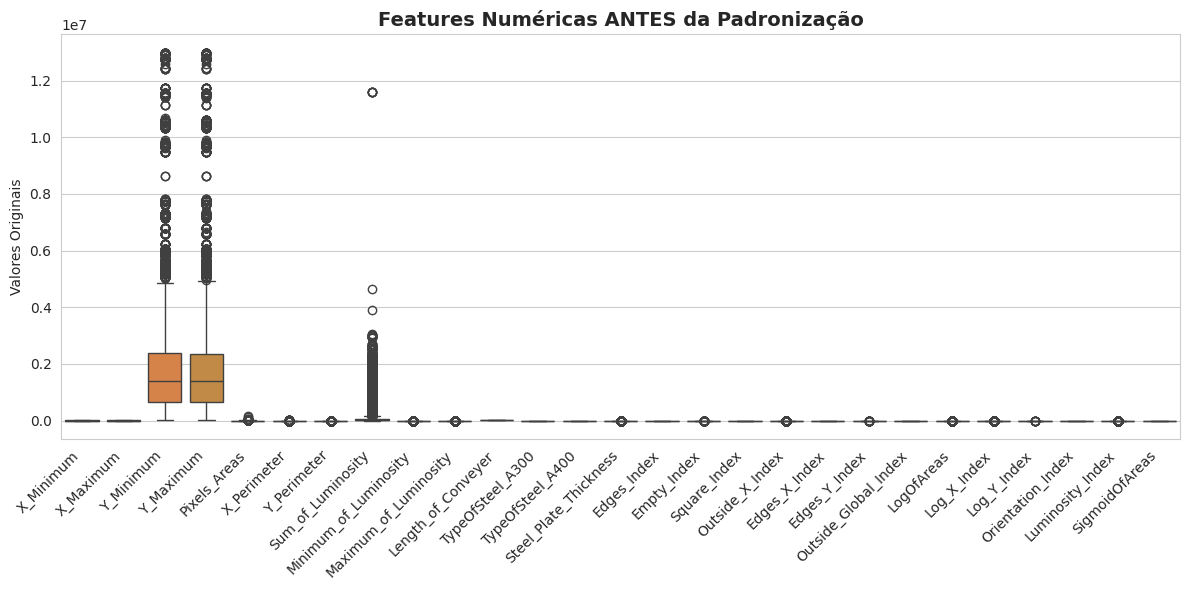


Features padronizadas com sucesso.


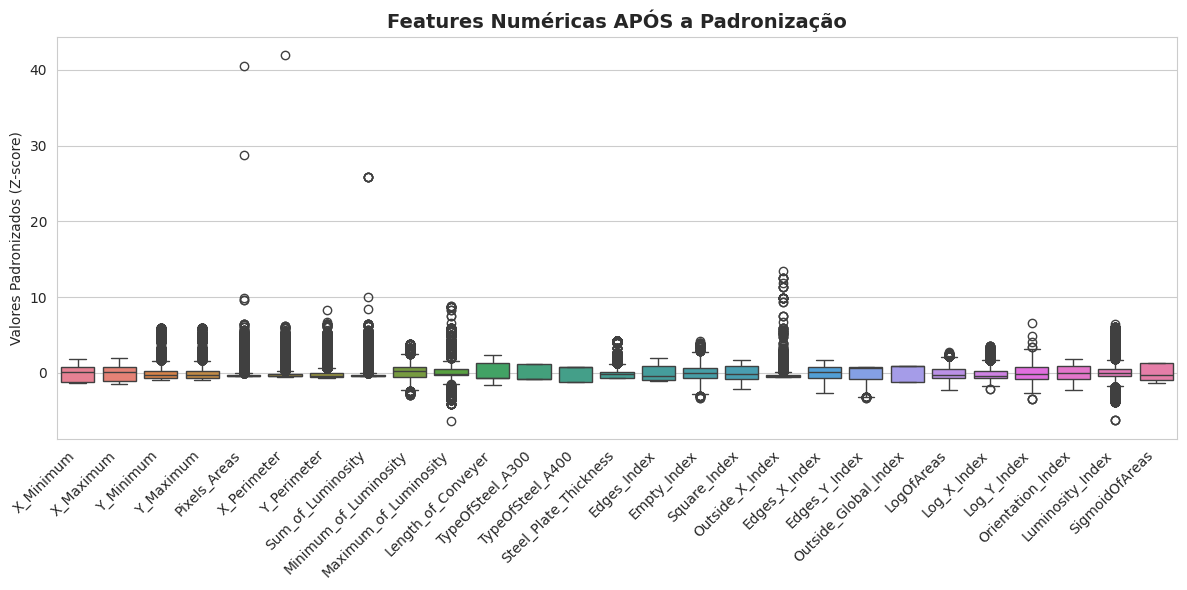


Primeiras linhas das features padronizadas (amostra):


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.236778,-0.327831,-0.493713,-0.493938,-0.447155,-0.492949,-0.585088,-0.428885,0.978888,0.799671,...,-0.522389,1.732355,0.761892,-1.227910,-1.669010,-0.875450,-1.703257,-1.235969,1.063494,-1.294971
1,0.184647,0.124329,-0.589127,-0.589709,-0.335365,-0.425464,-0.100187,-0.333403,-0.514188,-1.243070,...,-0.554101,-1.640168,0.761892,0.846618,0.214350,-1.142425,0.844958,1.310641,-1.340511,1.135420
2,-1.262119,-1.124112,0.190344,0.192770,2.601456,3.426816,3.521726,2.532830,-1.937820,0.870111,...,1.629799,-1.701772,-2.018246,-1.227910,2.081276,1.851790,2.021418,-0.232212,0.365477,1.288636
3,0.133850,0.070310,0.789801,0.794500,-0.395147,-0.447959,-0.347586,-0.426785,1.013611,0.377035,...,-0.554101,-1.078081,0.449619,0.846618,-0.198900,-1.142425,0.102736,1.156438,0.815864,-0.509925
4,1.561802,1.612854,-0.646859,-0.647650,-0.311774,-0.133028,0.028460,-0.324913,-0.097516,-1.243070,...,-0.241209,-1.817787,0.698985,0.846618,0.389091,0.218738,1.210891,1.667237,-0.890123,1.288034


In [32]:
if not steel_data.empty and numeric_feature_cols:
    # As features a serem escalonadas são aquelas em 'numeric_feature_cols'
    # que já foram definidas como features numéricas não-target e não-ID.
    features_to_scale = [col for col in numeric_feature_cols if col in steel_data.columns]

    if features_to_scale:
        print(f"\nPadronizando as seguintes {len(features_to_scale)} features numéricas:")
        print(features_to_scale)

        scaler = StandardScaler()

        # Visualização antes da normalização
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=steel_data[features_to_scale])
        plt.title("Features Numéricas ANTES da Padronização", fontsize=14, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Valores Originais')
        plt.tight_layout()
        plt.show()

        # Aplicação da padronização
        steel_data[features_to_scale] = scaler.fit_transform(steel_data[features_to_scale])
        print("\nFeatures padronizadas com sucesso.")

        # Visualização após normalização
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=steel_data[features_to_scale])
        plt.title("Features Numéricas APÓS a Padronização", fontsize=14, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Valores Padronizados (Z-score)')
        plt.tight_layout()
        plt.show()

        print("\nPrimeiras linhas das features padronizadas (amostra):")
        display(steel_data[features_to_scale].head())
    else:
        print("\nNenhuma feature numérica encontrada para padronizar.")
else:
    print("\nDataset ou features numéricas não disponíveis para padronização.")


A padronização foi aplicada às 27 features numéricas. A justificativa para este passo reside na grande variação de escalas observada na seção 2.4 (Estatísticas Descritivas) e 2.5 (Distribuição das Features).


3.5 Tratamento de Outliers por Capping

**Importante:** Estas funções são para serem usadas **APÓS a divisão do `train.csv` em conjuntos de treino e teste internos (X_train, X_test)**.
Os limites (thresholds) devem ser calculados (usando `calculate_outlier_thresholds`) **apenas em `X_train`**.
Depois, a função `cap_outliers_traintest` deve ser usada para aplicar esses limites tanto a `X_train` quanto a `X_test`.

In [33]:
def calculate_outlier_thresholds(dataframe_train, column, q1_val=0.25, q3_val=0.75):
    """
    Calcula os limites inferior e superior para capping de outliers usando o método IQR.
    DEVE ser usado APENAS no conjunto de treino.

    Parâmetros:
    dataframe_train (pd.DataFrame): O DataFrame de treino.
    column (str): O nome da coluna para calcular os limites.
    q1_val (float): O percentil para Q1.
    q3_val (float): O percentil para Q3.

    Retorna:
    tuple: (limite_inferior, limite_superior)
    """
    Q1 = dataframe_train[column].quantile(q1_val)
    Q3 = dataframe_train[column].quantile(q3_val)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit, upper_limit

def cap_outliers_traintest(df_train, df_test, column, lower_limit, upper_limit):
    """
    Aplica o capping de outliers a uma coluna específica nos DataFrames de treino e teste,
    usando os limites pré-calculados do conjunto de treino.

    Modifica os DataFrames inplace.

    Parâmetros:
    df_train (pd.DataFrame): DataFrame de treino.
    df_test (pd.DataFrame): DataFrame de teste.
    column (str): Nome da coluna para aplicar o capping.
    lower_limit (float): Limite inferior calculado a partir do treino.
    upper_limit (float): Limite superior calculado a partir do treino.
    """
    # Capping para o DataFrame de treino
    # Cuidado com SettingWithCopyWarning se df_train for uma fatia. Pode ser necessário .copy() antes.
    df_train.loc[df_train[column] < lower_limit, column] = lower_limit
    df_train.loc[df_train[column] > upper_limit, column] = upper_limit

    # Capping para o DataFrame de teste
    if df_test is not None: # Permite usar apenas para treino se df_test for None
        df_test.loc[df_test[column] < lower_limit, column] = lower_limit
        df_test.loc[df_test[column] > upper_limit, column] = upper_limit

    print(f"Capping aplicado à coluna '{column}'.")

# 4. SELEÇÃO DE FEATURES

A seleção de features visa escolher um subconjunto das features originais que são mais relevantes para o problema de predição. Isso pode:
* Melhorar o desempenho do modelo (reduzindo overfitting e ruído).
* Reduzir o tempo de treinamento.
* Aumentar a interpretabilidade do modelo.

Para este problema multi-rótulo, podemos usar uma abordagem que considera a importância da feature para cada um dos defeitos. O teste ANOVA F (f_classif) é um método univariado que avalia a relação entre cada feature e a variável alvo categórica.

**Método:**
1.  Para cada um dos 7 defeitos (targets), calculamos o F-score e o p-valor de cada feature.
2.  Agregamos esses scores (e.g., pela média dos F-scores) para obter uma medida geral da importância da feature em todos os targets.
3.  Selecionamos as `k` features com os maiores scores agregados.

**Teste de Hipótese ANOVA F-test (`f_classif`):**
* **Hipótese Nula ($H_0$)**: As médias da feature são iguais em todas as classes do target (ou seja, a feature não tem poder discriminatório para aquele target).
* **Hipótese Alternativa ($H_1$)**: Pelo menos uma média da feature é diferente entre as classes do target (a feature tem poder discriminatório).
* Um **F-score alto** e um **p-valor baixo** (tipicamente < 0.05) indicam que devemos rejeitar $H_0$, sugerindo que a feature é relevante para distinguir as classes daquele target.



Iniciando seleção de features. Selecionando top 20 de 27 features...

Top 20 features selecionadas considerando todos os defeitos (ordenadas por F-score médio):
['Log_X_Index', 'Outside_X_Index', 'LogOfAreas', 'Pixels_Areas', 'Edges_Y_Index', 'X_Perimeter', 'Sum_of_Luminosity', 'Y_Perimeter', 'Minimum_of_Luminosity', 'Log_Y_Index', 'SigmoidOfAreas', 'X_Minimum', 'Orientation_Index', 'X_Maximum', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Edges_Index', 'Outside_Global_Index', 'Length_of_Conveyer', 'Steel_Plate_Thickness']

Scores detalhados para todas as features (ordenadas por F-score médio):


,Pastry_F_score,Pastry_p_value,Z_Scratch_F_score,Z_Scratch_p_value,K_Scatch_F_score,K_Scatch_p_value,Stains_F_score,Stains_p_value,Dirtiness_F_score,Dirtiness_p_value,Bumps_F_score,Bumps_p_value,Other_Faults_F_score,Other_Faults_p_value,Avg_F_score,Significant_For_N_Defects
Log_X_Index,623.722573,1.669490e-135,65.426066,6.389050e-16,30272.528447,0.000000e+00,578.197111,6.674924e-126,137.820141,1.023944e-31,926.825588,7.468588e-199,817.640537,3.793991e-176,4774.594352,7
Outside_X_Index,379.631726,9.617816e-84,146.656533,1.236985e-33,29634.096231,0.000000e+00,161.903379,6.121898e-37,97.539135,5.988500e-23,1095.924093,9.018650e-234,935.825489,1.016887e-200,4635.939512,7
LogOfAreas,90.835258,1.741890e-21,48.407892,3.573147e-12,24046.902579,0.000000e+00,1404.089253,1.183604e-296,5.660354,1.736233e-02,1251.400396,1.287927e-265,761.780769,1.757231e-164,3944.153786,7
Pixels_Areas,199.222161,5.182177e-45,128.711824,9.750587e-30,18568.678194,0.000000e+00,116.028551,5.594631e-27,55.261460,1.099419e-13,1015.517961,3.323093e-217,767.171300,1.311007e-165,2978.655922,7
Edges_Y_Index,815.581743,1.019667e-175,47.118298,6.886747e-12,16390.698528,0.000000e+00,150.859510,1.516008e-34,135.121938,3.946886e-31,857.265023,2.109752e-184,448.253967,2.296104e-98,2692.128430,7
X_Perimeter,211.440426,1.193254e-47,95.807903,1.429424e-22,16088.898678,0.000000e+00,138.580908,6.999829e-32,48.523488,3.369113e-12,961.503636,4.875912e-206,690.454357,1.547994e-149,2605.029914,7
Sum_of_Luminosity,168.239549,2.597499e-38,68.499651,1.351067e-16,13374.322933,0.000000e+00,106.517523,6.596599e-25,42.024167,9.234425e-11,863.034576,1.329452e-185,678.355235,5.375318e-147,2185.856233,7
Y_Perimeter,81.448859,1.964325e-19,74.375396,6.952887e-18,12664.711606,0.000000e+00,194.912678,4.420375e-44,7.186218,7.352835e-03,1046.515571,1.339839e-223,604.115429,2.265237e-131,2096.180823,7
Minimum_of_Luminosity,0.410617,5.216639e-01,72.118829,2.171729e-17,10100.398039,0.000000e+00,551.153389,3.462210e-120,115.775981,6.349655e-27,353.181700,4.309924e-78,876.503028,2.101186e-188,1724.220226,6
Log_Y_Index,25.705335,4.014208e-07,4.294267,3.825439e-02,8187.597578,0.000000e+00,1809.680222,0.000000e+00,49.226397,2.356510e-12,1091.788959,6.389852e-233,400.284469,3.770237e-88,1652.653890,7


<ipython-input-34-af019159902a>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_F_score', y=top_k_scores_for_plot.index, data=top_k_scores_for_plot, palette='viridis', orient='h')


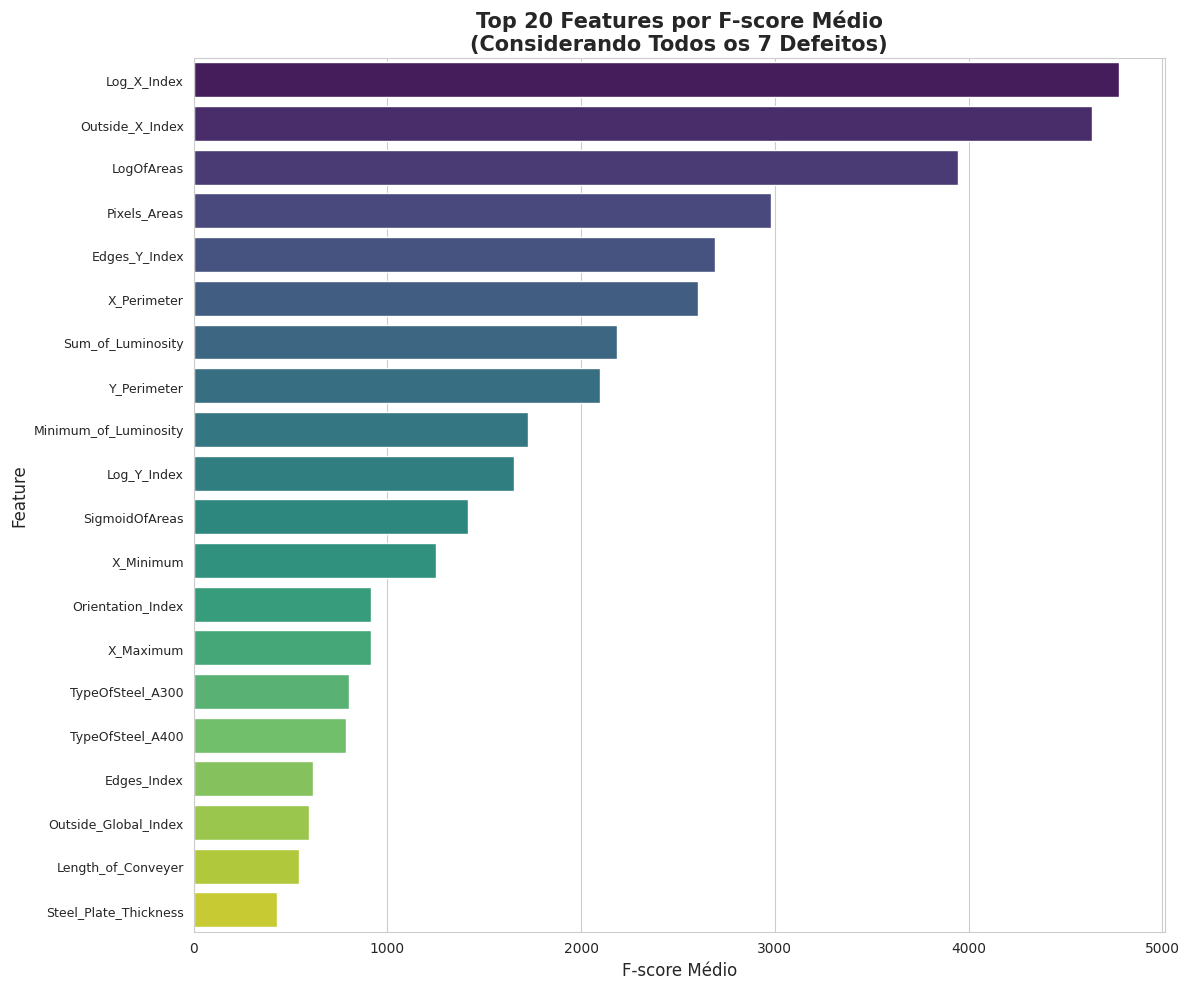

In [34]:
def multi_label_feature_selection(X, y_multilabel, all_feature_names, defect_names, k=20):
    """
    Seleção de features para problemas multi-rótulo considerando todos os targets.

    Parâmetros:
    X : np.array ou pd.DataFrame - Features do dataset (já pré-processadas, e.g., escalonadas)
    y_multilabel : pd.DataFrame - Targets multi-rótulo (colunas dos defeitos)
    all_feature_names : list - Nomes de todas as features em X
    defect_names : list - Nomes das colunas de defeitos
    k : int - Número de features a selecionar

    Retorna:
    selected_feature_names : list - Lista dos nomes das k features selecionadas
    feature_scores_df : DataFrame - Scores completos (F-scores, p-values, F-médio) para todas as features
    """
    if not isinstance(X, pd.DataFrame):
        X_df = pd.DataFrame(X, columns=all_feature_names)
    else:
        X_df = X

    feature_scores_data = {}

    for defect_idx, defect_name in enumerate(defect_names):
        current_y_target = y_multilabel.iloc[:, defect_idx] # Pega a coluna do defeito atual
        f_scores, p_values = f_classif(X_df, current_y_target)
        feature_scores_data[f'{defect_name}_F_score'] = f_scores
        feature_scores_data[f'{defect_name}_p_value'] = p_values

    feature_scores_df = pd.DataFrame(feature_scores_data, index=all_feature_names)

    # Calcula métricas consolidadas
    f_score_cols = [col for col in feature_scores_df.columns if '_F_score' in col]
    p_value_cols = [col for col in feature_scores_df.columns if '_p_value' in col]

    feature_scores_df['Avg_F_score'] = feature_scores_df[f_score_cols].mean(axis=1)
    # Conta para quantos defeitos a feature foi significativa (p < 0.05)
    feature_scores_df['Significant_For_N_Defects'] = (feature_scores_df[p_value_cols] < 0.05).sum(axis=1)

    # Seleciona as top k features baseado no F-score médio
    # Ordena primeiro por F-score médio, depois por número de defeitos para os quais foi significativa
    # (para desempatar ou priorizar features mais generalistas)
    top_k_features = feature_scores_df.sort_values(
        by=['Avg_F_score', 'Significant_For_N_Defects'],
        ascending=[False, False]
    ).head(k)

    selected_feature_names = top_k_features.index.tolist()

    return selected_feature_names, feature_scores_df.sort_values(by='Avg_F_score', ascending=False)


if not steel_data.empty and numeric_feature_cols and all(col in steel_data.columns for col in defect_columns):
    # 'numeric_feature_cols' contém os nomes das features que foram escalonadas.
    # Estas são as features que usaremos para a seleção.
    X_for_selection = steel_data[numeric_feature_cols]
    y_for_selection = steel_data[defect_columns]

    # Definindo o número de features a selecionar (k)
    # O dataset original tem 27 features (excluindo id e os 7 targets).
    # Escolher k=20 é uma redução, mas pode-se ajustar.
    # Se o número de features já é pequeno (e.g., < 30), pode-se usar todas ou k próximo do total.
    num_total_features = len(numeric_feature_cols)
    k_to_select = min(20, num_total_features) # Não selecionar mais do que o disponível

    print(f"\nIniciando seleção de features. Selecionando top {k_to_select} de {num_total_features} features...")

    selected_features_names, all_feature_scores = multi_label_feature_selection(
        X_for_selection,
        y_for_selection,
        all_feature_names=numeric_feature_cols, # Nomes das colunas em X_for_selection
        defect_names=defect_columns,
        k=k_to_select
    )

    print(f"\nTop {k_to_select} features selecionadas considerando todos os defeitos (ordenadas por F-score médio):")
    print(selected_features_names)

    print("\nScores detalhados para todas as features (ordenadas por F-score médio):")
    display(all_feature_scores.head(num_total_features)) # Mostrar todas as features e seus scores

    # Visualização dos resultados da seleção
    plt.figure(figsize=(12, 10)) # Aumentar altura para melhor visualização de k=20 features
    # Pegar as top k features do DataFrame de scores para plotar
    top_k_scores_for_plot = all_feature_scores.head(k_to_select)
    sns.barplot(x='Avg_F_score', y=top_k_scores_for_plot.index, data=top_k_scores_for_plot, palette='viridis', orient='h')
    plt.title(f'Top {k_to_select} Features por F-score Médio\n(Considerando Todos os 7 Defeitos)', fontsize=15, fontweight='bold')
    plt.xlabel('F-score Médio', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.yticks(fontsize=9)
    plt.tight_layout()
    plt.show()
else:
    print("\nDataset, features numéricas ou colunas de defeito não disponíveis para seleção de features.")
    selected_features_names = []


Observando os "Scores detalhados para todas as features":
* **Features Mais Relevantes (Alto `Avg_F_score` e `Significant_For_N_Defects` = 7):**
  * Estas features demonstram alta relevância estatística (p-valores muito baixos, não explicitamente listados aqui, mas implícitos nos altos F-scores) para distinguir as classes em todos ou quase todos os 7 tipos de defeitos, conforme indicado pelo `Significant_For_N_Defects` igual a 7 para muitas delas. Seus altos F-scores médios sugerem que elas têm, em geral, um forte poder preditivo.

* **Justificativa da Seleção (k=20 de 27):** A decisão de selecionar 20 features de 27 é uma forma de reduzir a dimensionalidade, potencialmente removendo features menos informativas ou ruidosas, o que pode levar a modelos mais simples, rápidos de treinar e, possivelmente, com melhor capacidade de generalização (reduzindo overfitting). As features descartadas seriam aquelas com os menores `Avg_F_score`.

A lista `selected_features_names` contém as 20 features que serão usadas para treinar os modelos.

In [35]:
# Preparação para a próxima fase (Modelagem) - Definindo X e y com base nas features selecionadas
if not steel_data.empty and selected_features_names and all(col in steel_data.columns for col in defect_columns):
    X_final = steel_data[selected_features_names]
    y_final = steel_data[defect_columns]
    print("\n--- Preparação para Modelagem ---")
    print(f"Features selecionadas para X_final (shape: {X_final.shape}):")
    print(X_final.columns.tolist())
    print(f"\nTargets para y_final (shape: {y_final.shape}):")
    print(y_final.columns.tolist())
else:
    print("\nNão foi possível definir X_final e y_final devido a etapas anteriores incompletas ou dataset vazio.")
    X_final, y_final = pd.DataFrame(), pd.DataFrame()



--- Preparação para Modelagem ---
Features selecionadas para X_final (shape: (19219, 20)):
['Log_X_Index', 'Outside_X_Index', 'LogOfAreas', 'Pixels_Areas', 'Edges_Y_Index', 'X_Perimeter', 'Sum_of_Luminosity', 'Y_Perimeter', 'Minimum_of_Luminosity', 'Log_Y_Index', 'SigmoidOfAreas', 'X_Minimum', 'Orientation_Index', 'X_Maximum', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Edges_Index', 'Outside_Global_Index', 'Length_of_Conveyer', 'Steel_Plate_Thickness']

Targets para y_final (shape: (19219, 7)):
['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']


# 5. PREPARAÇÃO DOS DADOS PARA MODELAGEM


Implementa uma classe customizada OutlierCapper para tratar valores extremos (outliers) em variáveis numéricas. O objetivo é limitar os valores fora do intervalo esperado para evitar que outliers prejudiquem a qualidade e a robustez do modelo preditivo.

Importância do tratamento de outliers:

Outliers podem causar distorções nas métricas estatísticas e enviesar o treinamento dos modelos.

Controlar outliers reduz ruído e aumenta a estabilidade e generalização do modelo.

Preserva a integridade dos dados ao ajustar valores extremos para limites aceitáveis.

Funcionamento da classe OutlierCapper:

Definição dos limites de corte:
Para cada feature numérica selecionada, calcula-se o intervalo interquartílico (IQR = Q3 - Q1).

Os limites inferior e superior são definidos por:

- limite inferior = 𝑄1 − fator × 𝐼𝑄𝑅

- limite superior = Q3 + fator × IQR

(O fator padrão é 1.5, clássico para detecção de outliers.)

Aplicação do capping:
Durante a transformação, valores abaixo do limite inferior são substituídos pelo limite inferior, e valores acima do limite superior são substituídos pelo limite superior. Valores dentro dos limites permanecem inalterados.

Flexibilidade:

Permite aplicar o capping a um subconjunto específico de colunas ou a todas as numéricas automaticamente.

Funciona com dados em formato pandas.DataFrame ou numpy.ndarray.

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier # GradientBoostingClassifier não foi usado na lista final de João
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression # Adicionado pois estava no notebook de exemplo
from lightgbm import LGBMClassifier # Adicionado pois estava no notebook de exemplo

from sklearn.metrics import (
    classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay,
    make_scorer, accuracy_score, precision_score, recall_score, f1_score, auc
)
from sklearn.pipeline import Pipeline # Usar Pipeline normal do scikit-learn para os passos externos
from imblearn.pipeline import Pipeline as imbPipeline # Usar Pipeline do imblearn para o estimador interno com SMOTE
from imblearn.over_sampling import SMOTE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class OutlierCapper(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, q1_val=0.25, q3_val=0.75, factor=1.5):
        self.columns = columns
        self.q1_val = q1_val
        self.q3_val = q3_val
        self.factor = factor
        self.thresholds_ = {}
        self.columns_to_cap_ = []

    def fit(self, X, y=None):
        X_df = X if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
        if self.columns is None:
            self.columns_to_cap_ = X_df.select_dtypes(include=np.number).columns.tolist()
            # Se X não tiver nomes de colunas (numpy array), não podemos selecionar por dtype
            if not self.columns_to_cap_ and isinstance(X, np.ndarray):
                 self.columns_to_cap_ = list(range(X.shape[1])) # Cap todas as colunas
        else:
            if isinstance(X, pd.DataFrame):
                self.columns_to_cap_ = [col for col in self.columns if col in X_df.columns]
            else: # Se X for numpy e self.columns for lista de índices
                self.columns_to_cap_ = [col_idx for col_idx in self.columns if col_idx < X_df.shape[1]]


        if not self.columns_to_cap_:
            # print("Aviso: Nenhuma coluna válida encontrada ou especificada para capping no OutlierCapper.")
            return self

        for col_idx_or_name in self.columns_to_cap_:
            # Usar iloc se col_idx_or_name for um índice numérico (para arrays numpy)
            col_data = X_df.iloc[:, col_idx_or_name] if isinstance(col_idx_or_name, int) and not isinstance(X_df.columns[0], str) else X_df[col_idx_or_name]
            Q1 = col_data.quantile(self.q1_val)
            Q3 = col_data.quantile(self.q3_val)
            IQR = Q3 - Q1
            lower_limit = Q1 - self.factor * IQR
            upper_limit = Q3 + self.factor * IQR
            self.thresholds_[col_idx_or_name] = (lower_limit, upper_limit)
        return self

    def transform(self, X):
        X_df = X if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
        X_copy = X_df.copy()

        # Determinar colunas a serem transformadas se fit não foi chamado adequadamente ou se X não tem nomes de colunas
        # Isso pode acontecer se o pipeline for usado em dados sem nomes de colunas correspondentes
        cols_to_process = self.columns_to_cap_
        if not self.thresholds_: # Se fit não estabeleceu thresholds
            # print("Aviso: OutlierCapper.transform() chamado antes de fit() ou fit() não encontrou colunas. Nenhuma transformação aplicada.")
            return X_copy if isinstance(X, pd.DataFrame) else X_copy.to_numpy()

        for col_idx_or_name in cols_to_process:
            if col_idx_or_name in self.thresholds_:
                lower_limit, upper_limit = self.thresholds_[col_idx_or_name]
                # Usar iloc se col_idx_or_name for um índice numérico
                if isinstance(col_idx_or_name, int) and not isinstance(X_copy.columns[0], str) :
                    X_copy.iloc[:, col_idx_or_name] = np.clip(X_copy.iloc[:, col_idx_or_name], lower_limit, upper_limit)
                else:
                    X_copy[col_idx_or_name] = np.clip(X_copy[col_idx_or_name], lower_limit, upper_limit)
        return X_copy if isinstance(X, pd.DataFrame) else X_copy.to_numpy()


--- Seção 5 em diante ---


Esta etapa prepara os dados e define uma estratégia robusta de avaliação para o problema multi-rótulo com sete defeitos desbalanceados.

Definição de variáveis independentes e dependentes:

- X contém as features selecionadas para predição.

- y contém as colunas dos defeitos (targets multi-rótulo).

Pipeline base:

- Aplica StandardScaler para normalização das features.

- Aplica SMOTE para balancear o conjunto de treinamento, gerando amostras sintéticas das classes minoritárias.

Validação Cruzada com K-Fold Estratificado Multi-rótulo:

- Justificativa: manter a proporção de cada defeito em cada fold para evitar viés em classes desbalanceadas.

- Utiliza RepeatedStratifiedKFold (adaptado para multi-rótulo) para garantir maior robustez nas métricas.

Métricas definidas para avaliação multi-rótulo:

- Acurácia, Precisão, Recall, F1-Score (médias ponderadas).

- ROC AUC com suporte para previsão probabilística.

Função evaluate_multilabel_with_kfold:

- Recebe modelo, features e targets.

- Executa K-Fold com shuffle e semente fixa.

- Para cada fold: treina o modelo, realiza predição e calcula as métricas definidas.

- Calcula métricas multi-rótulo de forma agregada e retorna um DataFrame com resultados consolidados.

Divisão inicial dos dados:

- Divide os dados em conjunto temporário para treino/validação e conjunto final para teste.

- Usa estratificação baseada no defeito mais raro para manter proporções na divisão.

- Essa divisão inicial é usada para exploração rápida, enquanto a avaliação principal é feita via K-Fold.

In [37]:
if 'selected_features_names' in locals() and selected_features_names:
    print(f"Usando {len(selected_features_names)} features selecionadas na Etapa 4.")
    X = steel_data[selected_features_names].copy() # Usar .copy() para evitar SettingWithCopyWarning
else:
    print("Aviso: 'selected_features_names' não encontrado. Revertendo para todas as colunas numéricas como features.")
    # Fallback: usar todas as colunas que não são 'id' (já removido) nem targets, nem as de engenharia
    cols_to_exclude = defect_columns + ['Total_Defects', 'Has_Defect']
    feature_columns_for_X = [col for col in steel_data.columns if col not in cols_to_exclude]
    X = steel_data[feature_columns_for_X].copy()

y = steel_data[defect_columns].copy()

print(f"Shape de X (features): {X.shape}")
print(f"Shape de y (targets): {y.shape}")
# print(f"Features utilizadas para modelagem: {X.columns.tolist()}")


# 6.2 Função para avaliação com K-Fold (Modificada para ROC AUC e robustez)
def evaluate_multilabel_with_kfold(pipeline_model, X_data, y_data, n_splits=5, random_state=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}

    # Garantir que X_data e y_data sejam DataFrames do Pandas para .iloc e tenham os mesmos índices
    if not isinstance(X_data, pd.DataFrame): X_data = pd.DataFrame(X_data)
    if not isinstance(y_data, pd.DataFrame): y_data = pd.DataFrame(y_data)
    X_data = X_data.reset_index(drop=True)
    y_data = y_data.reset_index(drop=True)


    for fold, (train_index, test_index) in enumerate(kf.split(X_data, y_data)):
        # print(f"  Iniciando Fold {fold+1}/{n_splits}")
        X_train_fold, X_test_fold = X_data.iloc[train_index], X_data.iloc[test_index]
        y_train_fold, y_test_fold = y_data.iloc[train_index], y_data.iloc[test_index]

        try:
            pipeline_model.fit(X_train_fold, y_train_fold)
            y_pred_fold = pipeline_model.predict(X_test_fold)

            metrics['accuracy'].append(accuracy_score(y_test_fold, y_pred_fold))
            metrics['precision'].append(precision_score(y_test_fold, y_pred_fold, average='weighted', zero_division=0))
            metrics['recall'].append(recall_score(y_test_fold, y_pred_fold, average='weighted', zero_division=0))
            metrics['f1'].append(f1_score(y_test_fold, y_pred_fold, average='weighted', zero_division=0))

            # ROC AUC
            # Acessar o MultiOutputClassifier (que deve ser o último passo nomeado 'classifier' no pipeline principal)
            moc_step = pipeline_model.named_steps.get('classifier')
            if hasattr(moc_step, 'predict_proba'):
                list_of_proba_arrays = moc_step.predict_proba(X_test_fold)
                # list_of_proba_arrays é uma lista de arrays, um por target. Cada array é (n_samples, n_classes_do_target)
                # Para classificação binária por target, pegamos a probabilidade da classe positiva (índice 1)
                y_prob_fold = np.array([proba_array[:, 1] for proba_array in list_of_proba_arrays]).T
                metrics['roc_auc'].append(roc_auc_score(y_test_fold, y_prob_fold, average='weighted', multi_class='ovr'))
            else:
                # print(f"Aviso: 'predict_proba' não encontrado no estimador MOC para o fold {fold+1}. ROC AUC será NaN.")
                metrics['roc_auc'].append(np.nan)
        except ValueError as ve: # Captura erros específicos do SMOTE ou outros
            print(f"Erro de ValueError no Fold {fold+1} (provavelmente SMOTE): {ve}. ROC AUC será NaN.")
            metrics['roc_auc'].append(np.nan) # Adiciona NaN para outras métricas também se o fit/predict falhar
            metrics['accuracy'].append(np.nan)
            metrics['precision'].append(np.nan)
            metrics['recall'].append(np.nan)
            metrics['f1'].append(np.nan)

        except Exception as e_fold:
            print(f"Erro geral no Fold {fold+1}: {e_fold}. Métricas serão NaN.")
            metrics['roc_auc'].append(np.nan)
            metrics['accuracy'].append(np.nan)
            metrics['precision'].append(np.nan)
            metrics['recall'].append(np.nan)
            metrics['f1'].append(np.nan)

    return pd.DataFrame(metrics)


# 6.3 Divisão dos dados em conjunto de desenvolvimento (temp) e teste final
# X e y já foram definidos acima usando as features selecionadas.
X_temp, X_test_final, y_temp, y_test_final = train_test_split(
    X, y,
    test_size=0.15,
    random_state=42,
    # A estratificação em y multi-label é complexa.
    # Tentar estratificar pela soma de 'Bumps' pode não ser ideal.
    # skmultilearn.model_selection.IterativeStratification seria mais apropriado.
    # Por simplicidade e para manter a estrutura de João, vamos tentar com 'Bumps' ou remover a estratificação.
    stratify=y['Bumps'] if 'Bumps' in y.columns and y['Bumps'].nunique() > 1 else None
)

print("\nDimensões dos conjuntos de dados:")
print(f"Conjunto de desenvolvimento (X_temp): {X_temp.shape}, (y_temp): {y_temp.shape}")
print(f"Conjunto de teste final (X_test_final): {X_test_final.shape}, (y_test_final): {y_test_final.shape}")

Usando 20 features selecionadas na Etapa 4.
Shape de X (features): (19219, 20)
Shape de y (targets): (19219, 7)

Dimensões dos conjuntos de dados:
Conjunto de desenvolvimento (X_temp): (16336, 20), (y_temp): (16336, 7)
Conjunto de teste final (X_test_final): (2883, 20), (y_test_final): (2883, 7)


# 6. MODELAGEM COM K-FOLD CROSS VALIDATION

cols_for_capping_and_scaling recebe todas as colunas numéricas de X_temp para serem usadas no tratamento de outliers e na normalização.

Como X já vem de features numéricas selecionadas, o uso direto das colunas está garantido.

Para evitar falhas no SMOTE, o parâmetro k_neighbors é fixado baixo (ex: 2).

- Cada modelo recebe um pipeline com:

- OutlierCapper para limitar outliers.

- StandardScaler para normalização.

- MultiOutputClassifier para lidar com multi-rótulo, encapsulando pipelines com SMOTE + modelo base.

In [38]:
# Colunas para o OutlierCapper: todas as colunas em X (assumindo que são numéricas)
# Se X tiver colunas não numéricas (não deveria se selected_features_names for usado corretamente),
# OutlierCapper precisa da lista `columns` especificada ou irá tentar em todas as numéricas.
# Como X vem de selected_features_names que são da EDA de features numéricas, está OK.
cols_for_capping_and_scaling = X_temp.columns.tolist()


# 6. MODELAGEM COM K-FOLD CROSS VALIDATION (JOÃO)

# 7.1 Definindo os modelos com pipelines completos e melhorados
# K_neighbors para SMOTE: Escolha um valor pequeno e fixo.
# Se a classe minoritária tiver menos que k_neighbors + 1 amostras em um fold, SMOTE falhará.
SMOTE_K_NEIGHBORS = 2 # Tente 1, 2 ou 3. Ajuste se houver erros de "n_samples < k_neighbors + 1".

models = {} # Inicializa o dicionário de modelos

# --- Random Forest ---
rf_single_target_pipeline = imbPipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=SMOTE_K_NEIGHBORS)),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1))
])
models['Random Forest'] = Pipeline([
    ('capper', OutlierCapper(columns=cols_for_capping_and_scaling)),
    ('scaler', StandardScaler()),
    ('classifier', MultiOutputClassifier(rf_single_target_pipeline, n_jobs=-1))
])

# --- SVM ---
svm_single_target_pipeline = imbPipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=SMOTE_K_NEIGHBORS)),
    ('model', SVC(kernel='rbf', probability=True, random_state=42))
])
models['SVM'] = Pipeline([
    ('capper', OutlierCapper(columns=cols_for_capping_and_scaling)),
    ('scaler', StandardScaler()),
    ('classifier', MultiOutputClassifier(svm_single_target_pipeline, n_jobs=-1))
])

# --- KNN ---
knn_single_target_pipeline = imbPipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=SMOTE_K_NEIGHBORS)),
    ('model', KNeighborsClassifier(n_jobs=-1)) # n_neighbors padrão é 5
])
models['KNN'] = Pipeline([
    ('capper', OutlierCapper(columns=cols_for_capping_and_scaling)),
    ('scaler', StandardScaler()),
    ('classifier', MultiOutputClassifier(knn_single_target_pipeline, n_jobs=-1))
])

# --- Logistic Regression  ---
lr_single_target_pipeline = imbPipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=SMOTE_K_NEIGHBORS)),
    ('model', LogisticRegression(random_state=42, solver='liblinear', max_iter=200)) # liblinear bom para datasets menores
])
models['Logistic Regression'] = Pipeline([
    ('capper', OutlierCapper(columns=cols_for_capping_and_scaling)),
    ('scaler', StandardScaler()),
    ('classifier', MultiOutputClassifier(lr_single_target_pipeline, n_jobs=-1))
])

# --- LGBM ---
lgbm_single_target_pipeline = imbPipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=SMOTE_K_NEIGHBORS)),
    ('model', LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1))
])
models['LGBM'] = Pipeline([
    ('capper', OutlierCapper(columns=cols_for_capping_and_scaling)),
    ('scaler', StandardScaler()),
    ('classifier', MultiOutputClassifier(lgbm_single_target_pipeline, n_jobs=-1))
])

Itera sobre cada modelo, executa validação cruzada usando a função evaluate_multilabel_with_kfold.

Usa cópias de X_temp e y_temp para evitar alterações inesperadas.

Armazena os resultados em results e imprime as métricas médias.

Captura erros para continuar a execução mesmo se algum modelo falh

In [39]:
# 7.2 Avaliação com K-Fold para cada modelo
results = {}
for name, model_pipeline in models.items():
    print(f"\n{'='*50}")
    print(f"Avaliando modelo: {name}")
    print(f"{'='*50}")
    try:
        cv_results_df = evaluate_multilabel_with_kfold(model_pipeline, X_temp.copy(), y_temp.copy()) # Usar cópias para segurança
        results[name] = cv_results_df
        print(f"\nResultados médios para {name} (K-Fold em X_temp, y_temp):")
        # Remover colunas que são apenas NaN antes de calcular a média para evitar warnings/erros
        print(cv_results_df.dropna(axis=1, how='all').mean())
    except Exception as e_eval:
        print(f"Erro CRÍTICO ao avaliar {name}: {e_eval}")
        results[name] = pd.DataFrame() # Armazenar DataFrame vazio em caso de erro completo


Avaliando modelo: Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: U


Resultados médios para Random Forest (K-Fold em X_temp, y_temp):
accuracy     0.440683
precision    0.557743
recall       0.547128
f1           0.551291
roc_auc      0.770897
dtype: float64

Avaliando modelo: SVM


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X


Resultados médios para SVM (K-Fold em X_temp, y_temp):
accuracy     0.247796
precision    0.468973
recall       0.824121
f1           0.580024
roc_auc      0.793474
dtype: float64

Avaliando modelo: KNN


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning


Resultados médios para KNN (K-Fold em X_temp, y_temp):
accuracy     0.287953
precision    0.446217
recall       0.687342
f1           0.533131
roc_auc      0.742387
dtype: float64

Avaliando modelo: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has fe


Resultados médios para Logistic Regression (K-Fold em X_temp, y_temp):
accuracy     0.217924
precision    0.452932
recall       0.790937
f1           0.555427
roc_auc      0.778333
dtype: float64

Avaliando modelo: LGBM

Resultados médios para LGBM (K-Fold em X_temp, y_temp):
accuracy     0.459660
precision    0.577531
recall       0.550507
f1           0.561737
roc_auc      0.741896
dtype: float64


Plota distribuições das métricas para todos os modelos usando seaborn.kdeplot.

Verifica a validade dos dados antes de plotar.

Organiza as métricas em subplots para melhor visualização.

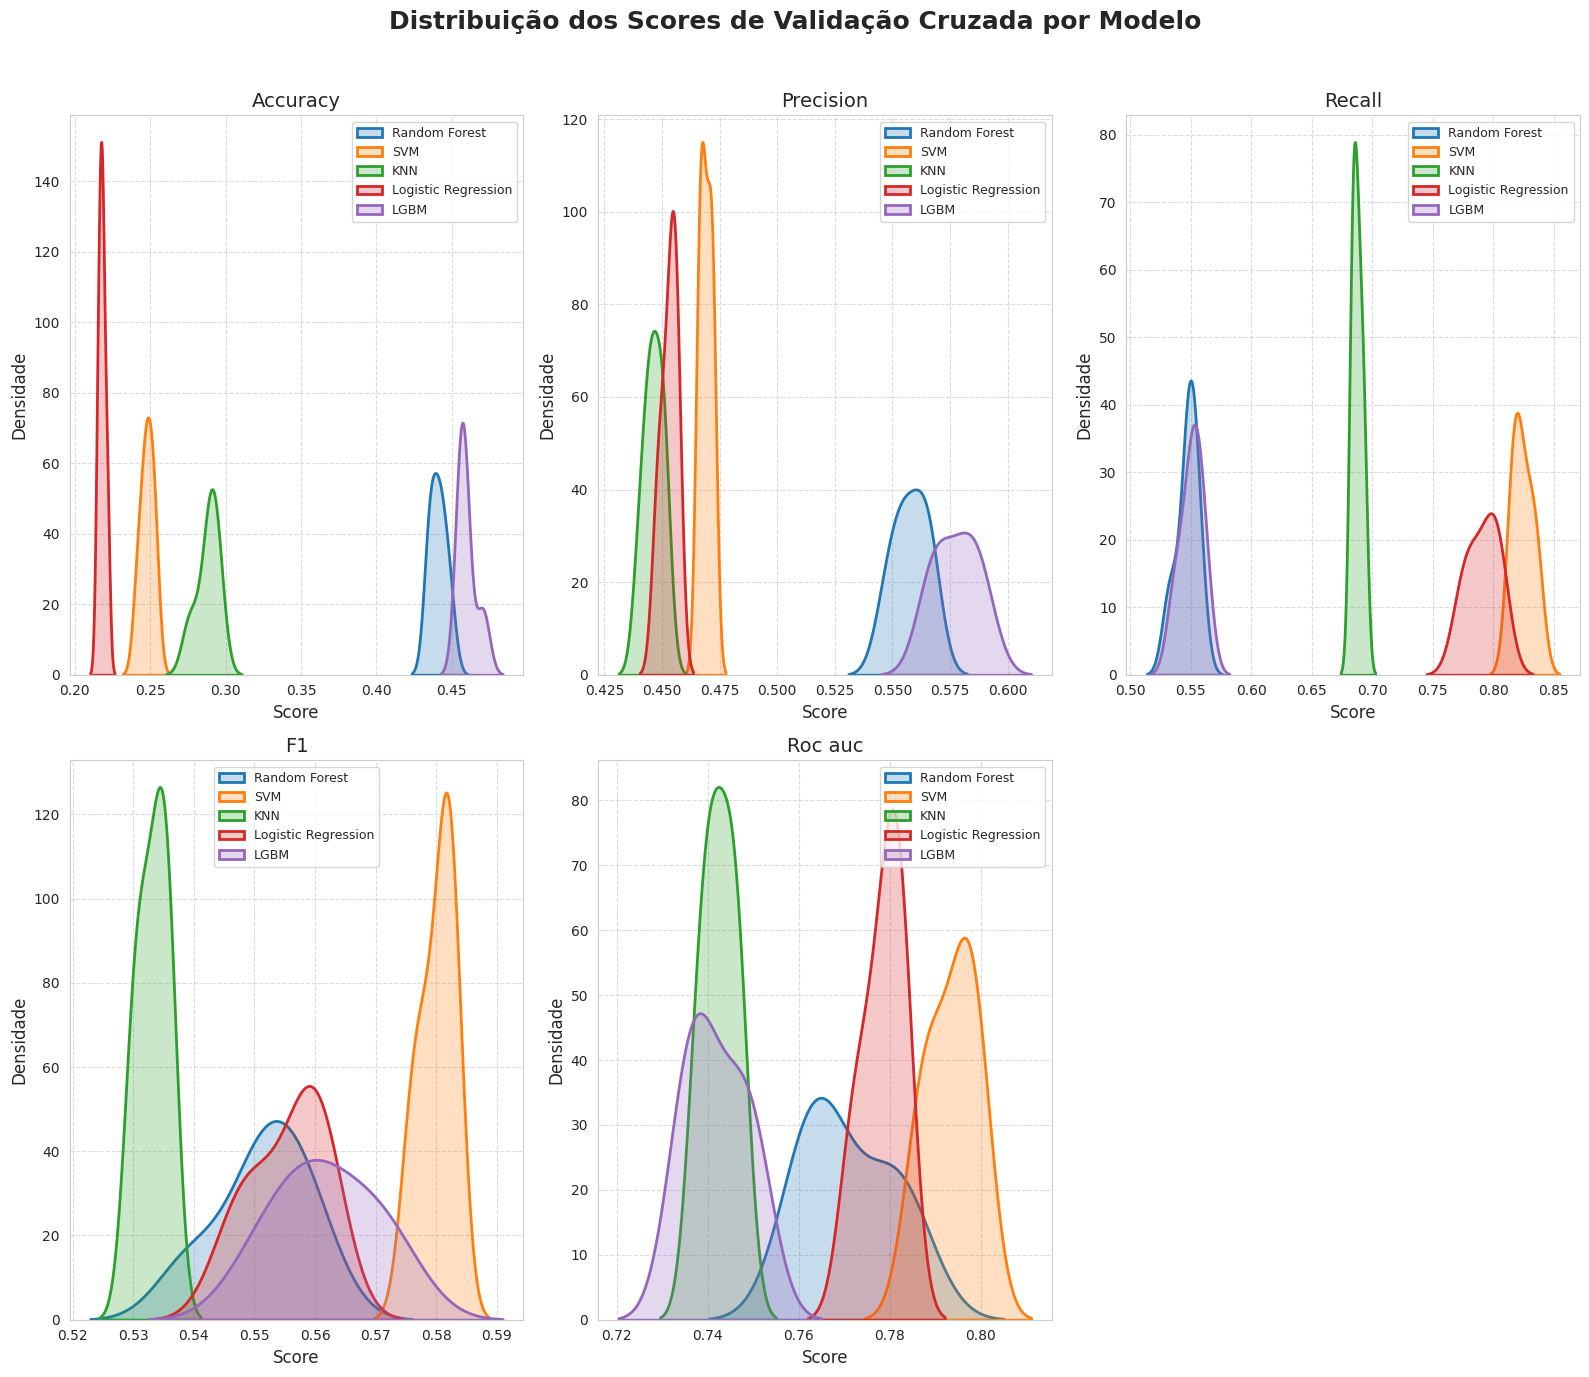

In [40]:
# 7.3 Visualização comparativa dos resultados (Modificada para robustez)
def plot_cv_results(cv_results_dict):
    plt.figure(figsize=(16, 14)) # Ajustado tamanho

    # Encontrar o primeiro resultado válido para obter nomes de métricas
    first_valid_key = next((key for key, df in cv_results_dict.items() if df is not None and not df.empty), None)

    if first_valid_key is None:
        print("Nenhuma métrica válida para plotar (todos os resultados são None ou vazios).")
        # plt.close() # Fecha a figura se não houver nada para plotar
        return

    metrics_to_plot = [
        m for m in cv_results_dict[first_valid_key].columns
        if m not in ['fit_time', 'score_time'] # Excluir tempos se existirem
    ]
     # Se ainda não houver métricas (ex: todas as colunas são NaN e foram dropadas no print)
    if not metrics_to_plot and not cv_results_dict[first_valid_key].empty:
        metrics_to_plot = cv_results_dict[first_valid_key].columns.tolist()


    num_metrics = len(metrics_to_plot)
    if num_metrics == 0:
        print("Nenhuma coluna de métrica encontrada nos resultados para plotar.")
        # plt.close()
        return

    rows_plot = (num_metrics + 2) // 3 # Tentar organizar em 3 colunas
    cols_plot = 3

    for i, metric in enumerate(metrics_to_plot):
        plt.subplot(rows_plot, cols_plot, i + 1)
        for model_name, res_df in cv_results_dict.items():
            if res_df is not None and not res_df.empty and metric in res_df:
                # Apenas plotar se a coluna da métrica não for toda NaN
                if res_df[metric].notna().any():
                    sns.kdeplot(res_df[metric].dropna(), label=model_name, fill=True, alpha=0.25, linewidth=2)
        plt.title(metric.replace('_', ' ').capitalize(), fontsize=14)
        plt.xlabel('Score', fontsize=12)
        plt.ylabel('Densidade', fontsize=12)
        plt.legend(fontsize=9)
        plt.grid(True, linestyle='--', alpha=0.7)

    plt.suptitle("Distribuição dos Scores de Validação Cruzada por Modelo", fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajustar para o suptitle
    plt.show()

if any(df is not None and not df.empty for df in results.values()):
    plot_cv_results(results)
else:
    print("Nenhum resultado de modelo para plotar.")

Considera somente modelos com resultados válidos e métricas roc_auc não NaN.

Prioriza seleção pelo ROC-AUC médio.

Caso roc_auc seja inválido para todos, usa F1-score médio.

Treina o melhor modelo com todo o conjunto X_temp, y_temp.

In [ ]:
# 7.4 Seleção do melhor modelo
valid_results = {k: v for k, v in results.items() if v is not None and not v.empty and v['roc_auc'].notna().any()} # Checa se roc_auc tem algum valor não-NaN
best_model_name = None
best_model_pipeline = None

if valid_results:
    # Priorizar ROC-AUC se houver valores válidos, senão F1-score
    if any(df['roc_auc'].notna().mean() > 0 for df in valid_results.values()): # Se alguma média de roc_auc for > 0 (ou seja, não tudo NaN)
        best_model_name = max(valid_results.keys(), key=lambda x: valid_results[x]['roc_auc'].mean(skipna=True))
        best_metric_value = valid_results[best_model_name]['roc_auc'].mean(skipna=True)
        print(f"\n🏆 Melhor modelo selecionado por ROC-AUC médio: {best_model_name} (ROC-AUC: {best_metric_value:.4f})")
    else:
        print("\nAviso: ROC-AUC contém apenas NaNs para todos os modelos. Usando F1-score médio para seleção.")
        if any(df['f1'].notna().any() for df in valid_results.values()):
            best_model_name = max(valid_results.keys(), key=lambda x: valid_results[x]['f1'].mean(skipna=True))
            best_metric_value = valid_results[best_model_name]['f1'].mean(skipna=True)
            print(f"\n🏆 Melhor modelo selecionado por F1-score médio: {best_model_name} (F1-score: {best_metric_value:.4f})")
        else:
            print("❌ Não foi possível determinar o melhor modelo (F1-score também contém apenas NaNs).")

    if best_model_name:
        best_model_pipeline = models[best_model_name]
        print(f"\n⏳ Treinando o melhor modelo ({best_model_name}) com todos os dados de desenvolvimento (X_temp, y_temp)...")
        best_model_pipeline.fit(X_temp, y_temp) # Treinar no conjunto X_temp completo
        print("✅ Melhor modelo treinado.")
else:
    print("❌ Nenhum modelo foi avaliado com sucesso para selecionar o melhor.")


🏆 Melhor modelo selecionado por ROC-AUC médio: SVM (ROC-AUC: 0.7935)

⏳ Treinando o melhor modelo (SVM) com todos os dados de desenvolvimento (X_temp, y_temp)...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


# 7. AVALIAÇÃO FINAL NO CONJUNTO DE TESTE

Predição dos rótulos (y_pred_final) no conjunto de teste usando o melhor modelo treinado.

Obtenção das probabilidades preditas (y_prob_final) para cada classe (se o modelo suportar predict_proba), usadas para métricas probabilísticas.

Cálculo dos scores ROC AUC ponderado e micro no conjunto de teste, para avaliar a qualidade probabilística do modelo.

Para cada defeito (label):

- Gera e imprime o relatório de classificação (precisão, recall, F1, etc).

- Plota a matriz de confusão para visualização dos acertos e erros.

- Se disponível, plota a curva ROC individual para o defeito, mostrando desempenho do classificador probabilístico.

Caso algum passo falhe (ex: falta de probabilidades, erro no cálculo), o código trata e imprime avisos ou erros, evitando falhas fatais.

- Acurácia: É a proporção de todas as previsões que o modelo acertou, em relação ao total de previsões feitas.
- Precisão: Das vezes que o modelo previu a classe positiva (ex: "defeito presente"), quantas vezes ele realmente acertou?
- Recall:  De todas as instâncias que realmente pertenciam à classe positiva (ex: todas as chapas que realmente tinham um defeito específico), quantas o modelo conseguiu identificar corretamente?
- F1-Score: É a média harmónica da precisão e do recall. É uma forma de encontrar um equilíbrio entre as duas.
- ROC AUC: A curva ROC é um gráfico que mostra a performance de um modelo de classificação em todos os limiares de classificação. Ela plota a Taxa de Verdadeiros Positivos (Recall) contra a Taxa de Falsos Positivos (FP / (FP + VN)) para diferentes limiares.

In [ ]:
# 7. AVALIAÇÃO FINAL NO CONJUNTO DE TESTE (X_test_final, y_test_final)
if best_model_pipeline is not None and best_model_name is not None:
    print(f"\n--- Avaliação Final do Modelo '{best_model_name}' no Conjunto de Teste Reservado ---")
    y_pred_final = best_model_pipeline.predict(X_test_final)

    y_prob_final = None
    try:
        moc_step_final = best_model_pipeline.named_steps.get('classifier')
        if hasattr(moc_step_final, 'predict_proba'):
            list_of_proba_arrays_final = moc_step_final.predict_proba(X_test_final)
            y_prob_final = np.array([proba_array[:, 1] for proba_array in list_of_proba_arrays_final]).T

        if y_prob_final is not None:
             roc_auc_final_weighted = roc_auc_score(y_test_final, y_prob_final, average='weighted', multi_class='ovr')
             roc_auc_final_micro = roc_auc_score(y_test_final, y_prob_final, average='micro', multi_class='ovr')
             print(f"\nROC AUC Score (Ponderado) no Teste Final: {roc_auc_final_weighted:.4f}")
             print(f"ROC AUC Score (Micro) no Teste Final: {roc_auc_final_micro:.4f}")
        else:
            print("Aviso: Não foi possível obter probabilidades para o conjunto de teste final (y_prob_final is None).")

    except Exception as e_roc_final:
        print(f"Erro ao calcular ROC AUC no teste final: {e_roc_final}")

    for i, defect_col_name in enumerate(defect_columns):
        print(f"\n{'='*40}")
        print(f"  Análise para defeito: {defect_col_name} (no Teste Final)")
        print(f"{'='*40}")

        print(classification_report(y_test_final[defect_col_name], y_pred_final[:, i], zero_division=0))

        plt.figure(figsize=(6,5))
        cm_final = confusion_matrix(y_test_final[defect_col_name], y_pred_final[:, i])
        sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
        plt.title(f'Matriz de Confusão - {defect_col_name}\n(Teste Final)', fontsize=14)
        plt.ylabel('Verdadeiro', fontsize=12)
        plt.xlabel('Previsto', fontsize=12)
        plt.show()

        if y_prob_final is not None and hasattr(best_model_pipeline.named_steps.get('classifier'), 'estimators_'):
            try:
                final_classifier_step = best_model_pipeline.named_steps['classifier']
                if hasattr(final_classifier_step, 'estimators_') and len(final_classifier_step.estimators_) > i :
                    final_individual_estimator_pipeline = final_classifier_step.estimators_[i]
                    # O modelo real está no final do pipeline do estimador individual
                    actual_model_in_pipeline = final_individual_estimator_pipeline.named_steps['model']

                    # Para RocCurveDisplay.from_estimator, o X precisa ser o X_test_final *antes* do SMOTE.
                    # O pipeline do estimador individual (SMOTE + model) não pode ser usado diretamente
                    # com from_estimator se X_test_final não passou pelo SMOTE.
                    # É mais seguro calcular FPR, TPR manualmente se predict_proba está disponível.

                    fpr, tpr, _ = RocCurveDisplay.from_predictions(
                        y_test_final[defect_col_name], # y_true
                        y_prob_final[:, i],            # y_pred (probabilidades da classe positiva)
                        name=f"ROC {defect_col_name}"
                    ).fpr, RocCurveDisplay.from_predictions(
                        y_test_final[defect_col_name], # y_true
                        y_prob_final[:, i],            # y_pred (probabilidades da classe positiva)
                        name=f"ROC {defect_col_name}"
                    ).tpr

                    roc_auc_val = auc(fpr, tpr)

                    plt.figure(figsize=(7,6))
                    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc_val:.2f})')
                    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                    plt.xlim([0.0, 1.0])
                    plt.ylim([0.0, 1.05])
                    plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
                    plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=12)
                    plt.title(f'Curva ROC - {defect_col_name}\n(Teste Final)', fontsize=14)
                    plt.legend(loc="lower right", fontsize=10)
                    plt.grid(True, linestyle='--', alpha=0.7)
                    plt.show()

            except Exception as e_roc_plot:
                print(f"  Erro ao plotar Curva ROC para {defect_col_name} no teste final: {e_roc_plot}")
        elif y_prob_final is not None: # Se não for MOC com estimators mas tivermos y_prob_final
             # Este bloco pode ser ativado se o MOC não tiver estimators_ mas o pipeline principal tiver predict_proba
             pass # A lógica acima com from_predictions já cobre isso.


else:
    print("\n❌ Nenhum modelo foi treinado com sucesso para avaliação final.")